<a href="https://colab.research.google.com/github/arcra-inc/ai-kaigisitu/blob/main/%E4%B8%B8%E6%A5%BD%E7%B4%99%E5%88%A4%E5%AE%9A_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Áí∞Â¢ÉË®≠ÂÆö„ÉªÂàùÊúüÂåñ


In [1]:
!ls /content/drive/MyDrive

 20250217_Â§ßÂíåÂøÉÂæ°‰∏≠_Ê•≠ÂãôÂßîË®óÂ•ëÁ¥ÑÊõ∏.gdoc
 20250422_„Çø„Çô„Ç§„Ç≠„É≥Â∑•Ê•≠Ê†™Âºè‰ºöÁ§æÂæ°‰∏≠_ARCRA.gdoc
 240621_‰πùÂ∑ûÊ©üÈõªÊ†™Âºè‰ºöÁ§æÂæ°‰∏≠_„Éï„Ç£„Éº„Éà„Çô„Éè„Çô„ÉÉ„ÇØ„Ç∑„Éº„Éà.gsheet
'241011_imagicaÂæ°‰∏≠ (1).gslides'
 241011_imagicaÂæ°‰∏≠.gslides
 250317_„Ç§„Éû„Ç∑„Çô„Ç´„ÇØ„Çô„É´„Éº„Éï„ÇöÂæ°‰∏≠.pptx
 250410_Ê†™Âºè‰ºöÁ§æ„Å¶„Çô„Çì„Åù„ÅèÂæ°‰∏≠_„Åì„ÇôÂ•ëÁ¥ÑÊõ∏.gdoc
 250425_DAIKIN_„Ç∑„Çπ„ÉÜ„É†ÂàÜÊûê„ÅäË¶ãÁ©ç„ÇÇ„Çä.gsheet
 250613_ÈÇ£È†àÂª∫Ë®≠-ÈõªÂ≠êÈªíÊùøÊèêÊ°à.gslides
'4Êúà12Êó•„Åä„Å´„Åç„Çô„Çä„Éè„Çö„Éº„ÉÜ„Ç£ ÂèÇÂä†„Éï„Ç©„Éº„É†.gform'
'ARCRA ‰Ωø„ÅÑÊñπ„Ç´„Çô„Ç§„Éà„Çô.pptx'
'Colab Notebooks'
'Google Admin Downloads'
 PrefabÊßò_„Åì„ÇôÂÖ±ÊúâË≥áÊñô.gdoc
 „Åä„Å´„Åç„Çô„Çä4Êúà.gsheet
 „Ç´„Çô„É≥„Éà„ÉÅ„É£„Éº„Éà.gsheet
 „É≠„Éàweb„Çµ„Ç§„Éà-„Éï„Ç£„Éº„Éà„Çô„Éè„Çô„ÉÉ„ÇØÁÆ°ÁêÜË°®.gsheet
 „É≠„Éà„Ç≠„É£„É™„Ç¢Ê±∫Ê∏à„Ç∑„Çπ„ÉÜ„É†-ËÄÉÂØü.gsheet
 „É≠„Éà„ÉÜ„Çπ„Éà„Ç±„Éº„Çπ.gsheet
 ‰πùÂ∑ûÊ©üÈõªÂæ°‰∏≠_AWSË®≠ÂÆö.gslides
 ‰∫∫ÊùêÊé°Áî®.gsheet
 Â∑•Á®ãË°®Ë¶Å‰ª∂ÂÆöÁæ©.gsheet
 Âª∫ÁØâÊ•≠Áïå„Åã„ÇôÁõÆÊåá„ÅôÁä∂ÊÖã.p

In [2]:
# === Google Drive „Éû„Ç¶„É≥„Éà ===
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# === „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà ===
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, RandomSampler, Subset, Dataset
from tqdm.auto import tqdm  # ÈÄ≤Êçó„Éê„ÉºÔºàI/OË≤†Ëç∑„ÇíÊäë„Åà„ÇãË®≠ÂÆö„ÅßÂæåËø∞Ôºâ
from torchvision import transforms, models
from PIL import Image
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['DejaVu Sans', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
import time
import json
import random
import math

# GPU‰ΩøÁî®Ë®≠ÂÆö
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"‰ΩøÁî®„Éá„Éê„Ç§„Çπ: {device}")

# ÁîªÂÉè„Çµ„Ç§„Ç∫„ÅåÂõ∫ÂÆöÔºà224Ôºâ„Å™„Çâ cuDNN „ÅÆ„Ç¢„É´„Ç¥„É™„Ç∫„É†Êé¢Á¥¢„ÇíÊúâÂäπÂåñ
torch.backends.cudnn.benchmark = True
# PyTorch 2.x: matmul „ÅÆÊúÄÈÅ©ÂåñÔºàA100/T4 „Å™„Å©„ÅßÂäπ„Åè„Åì„Å®„ÅåÂ§ö„ÅÑÔºâ
if hasattr(torch, "set_float32_matmul_precision"):
    torch.set_float32_matmul_precision("high")

‰ΩøÁî®„Éá„Éê„Ç§„Çπ: cuda


In [93]:
# === „Éë„ÇπË®≠ÂÆö„Éª„Éë„É©„É°„Éº„ÇøÂÆöÁæ© ===
class Config:
    # === „Éë„ÇπË®≠ÂÆö ===
    # PARENT_DIR = Path('/content/drive/MyDrive/Á¥ô„ÅÆ„Çπ„Ç≠„É£„É≥„Éá„Éº„Çø')  # ÂÄã‰∫∫Drive
    PARENT_DIR = Path('/content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/Á¥ô„ÅÆ„Çπ„Ç≠„É£„É≥„Éá„Éº„Çø')  # ÂÖ±ÊúâDrive
    DATASET_DIR = Path('/content/paper_dataset')  # ‰ΩúÊ•≠Áî®„Éá„Ç£„É¨„ÇØ„Éà„É™

    # === „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰øùÂ≠òÂÖàË®≠ÂÆö ===
    # ÂÖ±Êúâ„Éâ„É©„Ç§„Éñ„Å´‰øùÂ≠òÔºà„ÉÅ„Éº„É†ÂÖ®‰Ωì„Åß„Ç¢„ÇØ„Çª„ÇπÂèØËÉΩÔºâ
    INDEX_SAVE_DIR = Path('/content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´')
    # ÂÄã‰∫∫„Éâ„É©„Ç§„Éñ„Å´‰øùÂ≠ò„Åô„ÇãÂ†¥Âêà„ÅØ‰ª•‰∏ã„Çí„Ç≥„É°„É≥„Éà„Ç¢„Ç¶„Éà
    # INDEX_SAVE_DIR = Path('/content/drive/MyDrive/paper_classification_indices')

    # === „Éá„Éº„ÇøÂàÜÂâ≤ ===
    TRAIN_CHILDREN = ['1500', 'IV']   # Â≠¶ÁøíÁî®„Éï„Ç©„É´„ÉÄ
    TEST_CHILDREN = ['7700']          # „ÉÜ„Çπ„ÉàÁî®„Éï„Ç©„É´„ÉÄ

    # === „Éë„ÉÉ„ÉÅË®≠ÂÆö ===
    PATCH_SIZE = 224
    TRAIN_STRIDE = 224
    TEST_STRIDE = 224  # „ÉÜ„Çπ„ÉàÊôÇ„ÅØ„Çà„ÇäÁ≤ó„Åè

    # === Â≠¶ÁøíË®≠ÂÆö ===
    BATCH_SIZE = 128
    LEARNING_RATE = 1e-4
    NUM_EPOCHS = 3

    # === „Åù„ÅÆ‰ªñ ===
    IMG_EXTS = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.webp'}
    TRAIN_SUBSET_SIZE = 4400  # Â≠¶Áøí„Éá„Éº„Çø„Çµ„Éñ„Çª„ÉÉ„ÉàÊï∞

    # === Â≠¶ÁøíÈ´òÈÄüÂåñ„Ç™„Éó„Ç∑„Éß„É≥ ===
    # 1„Ç®„Éù„ÉÉ„ÇØ„Åß‰Ωø„ÅÜÂ≠¶Áøí„Çµ„É≥„Éó„É´Êï∞Ôºà„Éë„ÉÉ„ÉÅÔºâ‰∏äÈôê„ÄÇÂ§ßË¶èÊ®°„Å™„Çâ 50_000 ÔΩû 200_000 „ÅßÊ§úË®é
    TRAIN_SAMPLES_PER_EPOCH = 12_000   # ‰æã
    # Ê§úË®º„Åß‰Ωø„ÅÜ„Çµ„É≥„Éó„É´Êï∞Ôºà‰∏äÈôêÔºâ„ÄÇÊó©Âõû„ÅóÁî®„Å´ 10k„Äú30k „Å™„Å©
    VAL_MAX_SAMPLES = 20_000            # ‰æã

    # DataLoader ÊúÄÈÅ©Âåñ
    NUM_WORKERS = 2          # Colab Pro „Å™„Çâ 4„Äú8 „ÅßÊßòÂ≠êË¶ã
    PREFETCH_FACTOR = 4
    PIN_MEMORY = True
    PERSISTENT_WORKERS = True

    # AMP / compile / channels-last
    USE_AMP = False
    USE_TORCH_COMPILE = False
    USE_CHANNELS_LAST = False

    # === ‰π±Êï∞„Ç∑„Éº„Éâ ===
    RANDOM_SEED = 42

# Ë®≠ÂÆö„ÇíÈÅ©Áî®
config = Config()
config.DATASET_DIR.mkdir(parents=True, exist_ok=True)
config.INDEX_SAVE_DIR.mkdir(parents=True, exist_ok=True)  # „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰øùÂ≠ò„Éá„Ç£„É¨„ÇØ„Éà„É™‰ΩúÊàê

print("=== „Éë„ÇπÁ¢∫Ë™ç ===")
print(f"PARENT_DIR: {config.PARENT_DIR.resolve()}")
print(f"Â≠òÂú®Á¢∫Ë™ç: {config.PARENT_DIR.exists()}")
print(f"INDEX_SAVE_DIR: {config.INDEX_SAVE_DIR.resolve()}")
print(f"„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰øùÂ≠òÂÖàÂ≠òÂú®Á¢∫Ë™ç: {config.INDEX_SAVE_DIR.exists()}")

# ‰π±Êï∞„Ç∑„Éº„ÉâÂõ∫ÂÆö
random.seed(config.RANDOM_SEED)
torch.manual_seed(config.RANDOM_SEED)

=== „Éë„ÇπÁ¢∫Ë™ç ===
PARENT_DIR: /content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/Á¥ô„ÅÆ„Çπ„Ç≠„É£„É≥„Éá„Éº„Çø
Â≠òÂú®Á¢∫Ë™ç: True
INDEX_SAVE_DIR: /content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´
„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰øùÂ≠òÂÖàÂ≠òÂú®Á¢∫Ë™ç: True


# 2. „Éá„Éº„ÇøÊ∫ñÂÇô

In [69]:
# === „Éá„Éº„ÇøÂèéÈõÜÈñ¢Êï∞ ===
def gather_samples(parent_dir, child_names, img_exts):
    """
    ÊåáÂÆö„Åï„Çå„ÅüÂ≠ê„Éï„Ç©„É´„ÉÄ„Åã„ÇâÁîªÂÉè„Éï„Ç°„Ç§„É´„Å®„ÇØ„É©„ÇπÊÉÖÂ†±„ÇíÂèéÈõÜ

    Args:
        parent_dir (Path): Ë¶™„Éá„Ç£„É¨„ÇØ„Éà„É™
        child_names (list): Â≠ê„Éï„Ç©„É´„ÉÄÂêç„ÅÆ„É™„Çπ„Éà
        img_exts (set): ÂØæË±°ÁîªÂÉèÊã°ÂºµÂ≠ê

    Returns:
        tuple: (samples, class_names)
            - samples: [(path, class_name), ...] „ÅÆ„É™„Çπ„Éà
            - class_names: „ÇØ„É©„ÇπÂêç„ÅÆ„Çª„ÉÉ„Éà
    """
    samples = []
    class_names = set()

    for name in child_names:
        child = parent_dir / name
        if not child.exists():
            raise FileNotFoundError(f'Â≠ê„Éï„Ç©„É´„ÉÄ„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì: {child}')

        print(f"üìÅ Âá¶ÁêÜ‰∏≠: {child.name}")

        # „ÇØ„É©„Çπ„Éá„Ç£„É¨„ÇØ„Éà„É™„ÇíËµ∞Êüª
        for cls_dir in sorted([p for p in child.iterdir() if p.is_dir()]):
            class_name = cls_dir.name
            class_names.add(class_name)

            # ÁîªÂÉè„Éï„Ç°„Ç§„É´„ÇíÂèéÈõÜ
            img_count = 0
            for p in cls_dir.rglob('*'):
                if p.is_file() and p.suffix.lower() in img_exts:
                    samples.append((p, class_name))
                    img_count += 1

            print(f"  üìÑ {class_name}: {img_count}Êûö")

    return samples, sorted(class_names)

In [70]:
# === „Éá„Éº„ÇøÂèéÈõÜÂÆüË°å ===
print("=== Â≠¶Áøí„Éá„Éº„ÇøÂèéÈõÜ ===")
train_samples, train_classes = gather_samples(
    config.PARENT_DIR,
    config.TRAIN_CHILDREN,
    config.IMG_EXTS
)

print("\n=== „ÉÜ„Çπ„Éà„Éá„Éº„ÇøÂèéÈõÜ ===")
test_samples, test_classes = gather_samples(
    config.PARENT_DIR,
    config.TEST_CHILDREN,
    config.IMG_EXTS
)

=== Â≠¶Áøí„Éá„Éº„ÇøÂèéÈõÜ ===
üìÅ Âá¶ÁêÜ‰∏≠: 1500
  üìÑ A-4„ÄÄËâ≤‰∏äË≥™: 464Êûö
  üìÑ B2„ÄÄ„Åµ„Åó„Çô„ÄÄ„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ„ÄÄÊñ∞„ÉªÊ∏ÖÊµÅ„ÄÄML„Éï„Ç°„Ç§„Éè„Çô„Éº„ÄÄÂ∞èË±ÜÊÆªCoC„ÄÄÊñ∞„ÉªÊòüÁâ©Ë™û„ÄÄ„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞Âà©‰ºë„ÄÄ„Éï„É©„Çπ„Ç≥: 254Êûö
  üìÑ D2„ÄÄÊñ∞Â•âÊõ∏È¢®„ÄÄÊñ∞„ÉªÂåóÊñé„ÄÄ„Éã„É•„Éº„É©„ÇØ„Çô„É™„É≥S„ÄÄ„Éí„Çô„Ç¢„É≥„Ç≥„Éç„É≠F: 146Êûö
  üìÑ E-2„ÄÄ„É¨„Çµ„Çô„ÉÉ„ÇØ66: 502Êûö
  üìÑ I1„ÄÄ„É°„Çø„É´„ÉÉ„ÇØ„ÄÄ„Çª„Ç§„É≥„Éà„Ç®„Ç≥„ÄÄ„É°„Çø„ÉÜ„Çô„Ç£„Éº„Éï„ÇöM„ÄÄ„Éè„Ç§„Éõ„Çô„Éº„É≥A: 108Êûö
  üìÑ J-1„ÄÄ„ÇØ„É≠„Éû„ÉÜ„Ç£„Ç≥A-FS„ÄÄNT„Éè„Çö„Ç§„É´„ÄÄXDT„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FS„ÄÄ„ÇØ„É©„Ç∑„Ç≥„ÇØ„Çô„É≠„Çπ„ÄÄ„ÇØ„É©„Ç∑„Ç≥„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FS„ÄÄ„ÇØ„É©„Ç∑„Ç≥„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FSÈ¢®„ÉªÊòü„Åè„Åô„Çô„Åó„ÄÄ„Éà„Çô„É™„Éº„Éï„Çö„ÉªW„ÄÄ„Éà„Çô„É™„Éº„Éï„ÇöF„ÄÄ„Ç¢„Éº„Éà„Éà„Çô„É™„Éº„Éï„Çö: 188Êûö
  üìÑ J3„ÄÄHSK„ÇØ„ÉÉ„Ç∑„Éß„É≥F„ÄÄÁâπA„ÇØ„ÉÉ„Ç∑„Éß„É≥„ÄÄSS„Ç≥„Éº„Çπ„Çø„Éº„ÄÄ„Éã„É•„Éº„Ç¶„Ç®„Éï„Çô„É≠„É≥„Ç´„É©„Éº„ÄÄ„Éï„Ç°„Éï„Çô„É™„ÉÉ„ÇØ„ÄÄ„Ç≥„É´„ÇØ„Ç∑„Éº„ÉàN: 88Êûö
  üìÑ L-5„ÄÄ„Ç§„É≥„Éè„Çô„

In [71]:
# === „ÇØ„É©„ÇπÊÉÖÂ†±ÊßãÁØâ ===
classes = sorted(list(set(train_classes) | set(test_classes)))
class_to_idx = {c: i for i, c in enumerate(classes)}
idx_to_class = {v: k for k, v in class_to_idx.items()}

print("=== „Éá„Éº„ÇøÁµ±Ë®à ===")
print(f"üìä Â≠¶ÁøíÁîªÂÉè: {len(train_samples)}Êûö")
print(f"üìä „ÉÜ„Çπ„ÉàÁîªÂÉè: {len(test_samples)}Êûö")
print(f"üìä „ÇØ„É©„ÇπÊï∞: {len(classes)}")
print(f"üìä „ÇØ„É©„Çπ‰æã: {classes[:5]}")

=== „Éá„Éº„ÇøÁµ±Ë®à ===
üìä Â≠¶ÁøíÁîªÂÉè: 4400Êûö
üìä „ÉÜ„Çπ„ÉàÁîªÂÉè: 2112Êûö
üìä „ÇØ„É©„ÇπÊï∞: 10
üìä „ÇØ„É©„Çπ‰æã: ['A-4\u3000Ëâ≤‰∏äË≥™', 'B2\u3000„Åµ„Åó„Çô\u3000„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ\u3000Êñ∞„ÉªÊ∏ÖÊµÅ\u3000ML„Éï„Ç°„Ç§„Éè„Çô„Éº\u3000Â∞èË±ÜÊÆªCoC\u3000Êñ∞„ÉªÊòüÁâ©Ë™û\u3000„Ç¢„Éà„É¢„Çπ\u3000Êñ∞„Ç¢„Éà„É¢„Çπ\u3000Êñ∞Âà©‰ºë\u3000„Éï„É©„Çπ„Ç≥', 'D2\u3000Êñ∞Â•âÊõ∏È¢®\u3000Êñ∞„ÉªÂåóÊñé\u3000„Éã„É•„Éº„É©„ÇØ„Çô„É™„É≥S\u3000„Éí„Çô„Ç¢„É≥„Ç≥„Éç„É≠F', 'E-2\u3000„É¨„Çµ„Çô„ÉÉ„ÇØ66', 'I1\u3000„É°„Çø„É´„ÉÉ„ÇØ\u3000„Çª„Ç§„É≥„Éà„Ç®„Ç≥\u3000„É°„Çø„ÉÜ„Çô„Ç£„Éº„Éï„ÇöM\u3000„Éè„Ç§„Éõ„Çô„Éº„É≥A']


# 3. „Éë„ÉÉ„ÉÅ„Éá„Éº„Çø„Çª„ÉÉ„Éà

In [72]:
# === „Éá„Éº„ÇøÂ§âÊèõË®≠ÂÆö ===
def get_transforms():
    size = 224  # 224Âõ∫ÂÆö
    train_transform = transforms.Compose([
        transforms.Resize((size, size)),
        transforms.RandomHorizontalFlip(p=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],
                             std=[0.229,0.224,0.225]),
    ])
    test_transform = transforms.Compose([
        transforms.Resize((size, size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],
                             std=[0.229,0.224,0.225]),
    ])
    return train_transform, test_transform


train_tf, test_tf = get_transforms()

In [73]:
# === PatchDataset„ÇØ„É©„ÇπÂÆöÁæ© ===
class PatchDataset(Dataset):
    """
    ÁîªÂÉè„Çí„Éë„ÉÉ„ÉÅ„Å´ÂàÜÂâ≤„Åó„Å¶Â≠¶Áøí„ÉªË©ï‰æ°„Åô„Çã„Éá„Éº„Çø„Çª„ÉÉ„Éà

    Features:
    - ÂãïÁöÑ„Éë„ÉÉ„ÉÅÁîüÊàêÔºà„É°„É¢„É™ÂäπÁéáÔºâ
    - ‰∫ãÂâçË®àÁÆó„Åï„Çå„Åü„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„ÉóÂØæÂøú
    - ÊüîËªü„Å™Â§âÊèõÂá¶ÁêÜ
    """

    def __init__(self, samples, class_to_idx, patch_size=64, stride=32,
                 transform=None, prebuilt_index_map=None):
        """
        Args:
            samples: [(path, class_name), ...] „ÅÆ„É™„Çπ„Éà
            class_to_idx: „ÇØ„É©„ÇπÂêç‚Üí„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅÆËæûÊõ∏
            patch_size: „Éë„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
            stride: „Éë„ÉÉ„ÉÅÈñìÈöî
            transform: ÁîªÂÉèÂ§âÊèõÂá¶ÁêÜ
            prebuilt_index_map: ‰∫ãÂâçË®àÁÆóÊ∏à„Åø„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÔºàÈ´òÈÄüÂåñÔºâ
        """
        self.samples = samples
        self.class_to_idx = class_to_idx
        self.ps = patch_size
        self.st = stride
        self.transform = transform

        if prebuilt_index_map is not None:
            print("üöÄ ‰∫ãÂâçË®àÁÆóÊ∏à„Åø„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„Éó„Çí‰ΩøÁî®")
            self.index_map = prebuilt_index_map
        else:
            print("üîÑ „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„Éó„Çí‰ΩúÊàê‰∏≠...")
            self._build_index_map()

    def _build_index_map(self):
        """„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„Éó„ÇíÊßãÁØâ"""
        self.index_map = []
        failed_count = 0

        for img_idx, (path, cls) in enumerate(tqdm(self.samples, desc="üìã „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê")):
            try:
                with Image.open(path) as im:
                    im = im.convert('RGB')
                    W, H = im.size

                max_x = max(0, W - self.ps)
                max_y = max(0, H - self.ps)
                xs = list(range(0, max_x + 1, self.st))
                ys = list(range(0, max_y + 1, self.st))

                # „Éë„ÉÉ„ÉÅ‰ΩçÁΩÆ„Çí„Åô„Åπ„Å¶Ë®òÈå≤
                for y in ys:
                    for x in xs:
                        self.index_map.append((img_idx, x, y))

            except Exception as e:
                failed_count += 1
                if failed_count <= 5:  # ÊúÄÂàù„ÅÆ5‰ª∂„ÅÆ„ÅøË≠¶ÂëäË°®Á§∫
                    print(f"‚ö†Ô∏è  ÁîªÂÉèË™≠„ÅøËæº„ÅøÂ§±Êïó: {path} ({e})")

        if failed_count > 0:
            print(f"‚ö†Ô∏è  Á∑èÂ§±Êïó‰ª∂Êï∞: {failed_count}‰ª∂")

    def __len__(self):
        return len(self.index_map)

    def __getitem__(self, idx):
        img_idx, x, y = self.index_map[idx]
        path, cls = self.samples[img_idx]

        try:
            with Image.open(path) as im:
                im = im.convert('RGB')
                patch = im.crop((x, y, x + self.ps, y + self.ps))

            if self.transform:
                patch = self.transform(patch)

            label = self.class_to_idx[cls]
            return patch, label

        except Exception as e:
            # „Ç®„É©„ÉºÊôÇ„ÅØÈªíÁîªÂÉè„ÇíËøî„ÅôÔºàÂ≠¶ÁøíÁ∂ôÁ∂öÔºâ
            patch = Image.new('RGB', (self.ps, self.ps), color='black')
            if self.transform:
                patch = self.transform(patch)
            return patch, 0

In [74]:
# === „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê„Éª‰øùÂ≠òÔºàËá™ÂãïÁ¢∫Ë™çÊ©üËÉΩ‰ªò„ÅçÔºâ===
def check_index_compatibility(save_path, samples, class_to_idx, patch_size, stride, subset_size=None):
    """
    ‰øùÂ≠òÊ∏à„Åø„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅåÁèæÂú®„ÅÆË®≠ÂÆö„Å®‰∫íÊèõÊÄß„Åå„ÅÇ„Çã„Åã„ÉÅ„Çß„ÉÉ„ÇØ

    Args:
        save_path: „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´„Éë„Çπ
        samples: ÁèæÂú®„ÅÆ„Çµ„É≥„Éó„É´
        class_to_idx: ÁèæÂú®„ÅÆ„ÇØ„É©„ÇπËæûÊõ∏
        patch_size: „Éë„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
        stride: „Çπ„Éà„É©„Ç§„Éâ
        subset_size: „Çµ„Éñ„Çª„ÉÉ„Éà„Çµ„Ç§„Ç∫

    Returns:
        bool: ‰∫íÊèõÊÄßÊúâÁÑ°
    """
    if not Path(save_path).exists():
        return False

    try:
        saved_data = torch.load(save_path, map_location="cpu")

        # Ë®≠ÂÆö„Éë„É©„É°„Éº„Çø„ÅÆÁ¢∫Ë™ç
        if (saved_data.get("patch_size") != patch_size or
            saved_data.get("stride") != stride):
            print(f"‚ö†Ô∏è  „Éë„É©„É°„Éº„Çø‰∏ç‰∏ÄËá¥: patch_size={saved_data.get('patch_size')}‚Üí{patch_size}, stride={saved_data.get('stride')}‚Üí{stride}")
            return False

        # „ÇØ„É©„ÇπËæûÊõ∏„ÅÆÁ¢∫Ë™ç
        if saved_data.get("class_to_idx") != class_to_idx:
            print(f"‚ö†Ô∏è  „ÇØ„É©„ÇπËæûÊõ∏‰∏ç‰∏ÄËá¥")
            return False

        # „Çµ„É≥„Éó„É´Êï∞„ÅÆÁ¢∫Ë™ç
        current_samples = samples[:subset_size] if subset_size else samples
        saved_samples = saved_data.get("samples", [])

        if len(saved_samples) != len(current_samples):
            print(f"‚ö†Ô∏è  „Çµ„É≥„Éó„É´Êï∞‰∏ç‰∏ÄËá¥: {len(saved_samples)} ‚Üí {len(current_samples)}")
            return False

        # „Éï„Ç°„Ç§„É´„Éë„Çπ„ÅÆÂ≠òÂú®Á¢∫Ë™çÔºà„Çµ„É≥„Éó„É™„É≥„Ç∞„ÉÅ„Çß„ÉÉ„ÇØÔºâ
        sample_indices = random.sample(range(len(saved_samples)), min(10, len(saved_samples)))
        for i in sample_indices:
            saved_path, saved_cls = saved_samples[i]
            if not Path(saved_path).exists():
                print(f"‚ö†Ô∏è  „Éï„Ç°„Ç§„É´‰∏çÂú®: {saved_path}")
                return False

        return True

    except Exception as e:
        print(f"‚ö†Ô∏è  „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´Ë™≠„ÅøËæº„Åø„Ç®„É©„Éº: {e}")
        return False

def create_or_load_index(samples, class_to_idx, patch_size, stride, save_path,
                        subset_size=None, force_recreate=False):
    """
    „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰ΩúÊàê„Åæ„Åü„ÅØÊó¢Â≠ò„ÅÆ„ÇÇ„ÅÆ„ÇíË™≠„ÅøËæº„Åø

    Args:
        samples: „Çµ„É≥„Éó„É´„É™„Çπ„Éà
        class_to_idx: „ÇØ„É©„ÇπËæûÊõ∏
        patch_size: „Éë„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
        stride: „Çπ„Éà„É©„Ç§„Éâ
        save_path: ‰øùÂ≠ò„Éë„Çπ
        subset_size: „Çµ„Éñ„Çª„ÉÉ„Éà„Çµ„Ç§„Ç∫
        force_recreate: Âº∑Âà∂ÂÜç‰ΩúÊàê„Éï„É©„Ç∞

    Returns:
        PatchDataset: „Éá„Éº„Çø„Çª„ÉÉ„Éà
    """
    save_path = Path(save_path)

    # Âº∑Âà∂ÂÜç‰ΩúÊàê„Åß„Å™„ÅÑÂ†¥Âêà„ÄÅÊó¢Â≠ò„Éï„Ç°„Ç§„É´„Çí„ÉÅ„Çß„ÉÉ„ÇØ
    if not force_recreate and check_index_compatibility(save_path, samples, class_to_idx, patch_size, stride, subset_size):
        print(f"‚úÖ ‰∫íÊèõÊÄß„ÅÆ„ÅÇ„Çã„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åó„Åü: {save_path}")

        # Êó¢Â≠ò„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø
        saved_data = torch.load(save_path, map_location="cpu")
        current_samples = samples[:subset_size] if subset_size else samples

        dataset = PatchDataset(
            current_samples, class_to_idx,
            patch_size=patch_size, stride=stride, transform=None,
            prebuilt_index_map=saved_data["index_map"]
        )

        print(f"üìÇ Êó¢Â≠ò„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπË™≠„ÅøËæº„ÅøÂÆå‰∫Ü")
        print(f"   üìä „Éë„ÉÉ„ÉÅÊï∞: {len(dataset):,}")
        print(f"   üìä ÁîªÂÉèÊï∞: {len(current_samples):,}")

        return dataset

    else:
        # Êñ∞Ë¶è‰ΩúÊàê
        if force_recreate:
            print(f"üîÑ Âº∑Âà∂ÂÜç‰ΩúÊàê„É¢„Éº„Éâ")
        else:
            print(f"üÜï Êñ∞Ë¶è„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê")

        if subset_size:
            samples = samples[:subset_size]
            print(f"üì¶ „Çµ„Éñ„Çª„ÉÉ„Éà‰ΩøÁî®: {len(samples)}Êûö")

        # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰ΩúÊàê
        dataset = PatchDataset(
            samples, class_to_idx,
            patch_size=patch_size, stride=stride, transform=None
        )

        # ‰øùÂ≠òÁî®„Éá„Éº„Çø
        save_data = {
            "samples": [(str(p), cls) for p, cls in samples],
            "class_to_idx": class_to_idx,
            "index_map": dataset.index_map,
            "patch_size": patch_size,
            "stride": stride,
            "created_time": time.time(),  # ‰ΩúÊàêÊôÇÂàª„ÇÇ‰øùÂ≠ò
            "config_hash": hash(str(sorted(class_to_idx.items())))  # Ë®≠ÂÆö„ÅÆ„Éè„ÉÉ„Ç∑„É•ÂÄ§
        }

        torch.save(save_data, save_path)
        print(f"üíæ Êñ∞Ë¶è‰øùÂ≠òÂÆå‰∫Ü: {save_path}")
        print(f"   üìä „Éë„ÉÉ„ÉÅÊï∞: {len(dataset):,}")
        print(f"   üìä ÁîªÂÉèÊï∞: {len(samples):,}")

        return dataset


In [75]:
# === „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàêË®≠ÂÆö ===
class IndexConfig:
    # Âº∑Âà∂ÂÜç‰ΩúÊàê„Éï„É©„Ç∞
    FORCE_RECREATE_TRAIN = False
    FORCE_RECREATE_TEST = False

    # „Éï„Ç°„Ç§„É´ÂêçË®≠ÂÆöÔºà„Éë„É©„É°„Éº„ÇøÂà•„Å´ÁÆ°ÁêÜÔºâ
    @staticmethod
    def get_index_filename(data_type, patch_size, stride, subset_size=None):
        """„Éë„É©„É°„Éº„Çø„Å´Âü∫„Å•„ÅÑ„Å¶„Éï„Ç°„Ç§„É´ÂêçÁîüÊàê"""
        base_name = f"{data_type}_p{patch_size}_s{stride}"
        if subset_size:
            base_name += f"_sub{subset_size}"
        return f"{base_name}_index.pt"

    @staticmethod
    def get_full_index_path(data_type, patch_size, stride, subset_size=None):
        """ÂÆåÂÖ®„Å™„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´„Éë„Çπ„ÇíÂèñÂæó"""
        filename = IndexConfig.get_index_filename(data_type, patch_size, stride, subset_size)
        return config.INDEX_SAVE_DIR / filename

index_config = IndexConfig()

In [76]:
# === Â≠¶ÁøíÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê„ÉªË™≠„ÅøËæº„Åø ===
print("=== Â≠¶ÁøíÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÂá¶ÁêÜ ===")

train_index_path = IndexConfig.get_full_index_path(
    "train", config.PATCH_SIZE, config.TRAIN_STRIDE, config.TRAIN_SUBSET_SIZE
)

train_ds_temp = create_or_load_index(
    train_samples, class_to_idx,
    config.PATCH_SIZE, config.TRAIN_STRIDE,
    train_index_path, config.TRAIN_SUBSET_SIZE,
    force_recreate=index_config.FORCE_RECREATE_TRAIN
)

=== Â≠¶ÁøíÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÂá¶ÁêÜ ===
üÜï Êñ∞Ë¶è„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê
üì¶ „Çµ„Éñ„Çª„ÉÉ„Éà‰ΩøÁî®: 4400Êûö
üîÑ „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„Éó„Çí‰ΩúÊàê‰∏≠...


üìã „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4400/4400 [01:03<00:00, 69.19it/s]


üíæ Êñ∞Ë¶è‰øùÂ≠òÂÆå‰∫Ü: /content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´/train_p224_s224_sub4400_index.pt
   üìä „Éë„ÉÉ„ÉÅÊï∞: 83,137
   üìä ÁîªÂÉèÊï∞: 4,400


In [77]:
# === „ÉÜ„Çπ„ÉàÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê„ÉªË™≠„ÅøËæº„Åø ===
print("\n=== „ÉÜ„Çπ„ÉàÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÂá¶ÁêÜ ===")

test_index_path = IndexConfig.get_full_index_path(
    "test", config.PATCH_SIZE, config.TEST_STRIDE
)

test_ds_temp = create_or_load_index(
    test_samples, class_to_idx,
    config.PATCH_SIZE, config.TEST_STRIDE,
    test_index_path,
    force_recreate=index_config.FORCE_RECREATE_TEST
)


=== „ÉÜ„Çπ„ÉàÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÂá¶ÁêÜ ===
üÜï Êñ∞Ë¶è„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê
üîÑ „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„Éó„Çí‰ΩúÊàê‰∏≠...


üìã „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàê: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2112/2112 [00:29<00:00, 71.20it/s]


üíæ Êñ∞Ë¶è‰øùÂ≠òÂÆå‰∫Ü: /content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´/test_p224_s224_index.pt
   üìä „Éë„ÉÉ„ÉÅÊï∞: 38,220
   üìä ÁîªÂÉèÊï∞: 2,112


In [78]:
# === DataLoaderÊßãÁØâÔºàÈ´òÈÄüÂåñÂØæÂøúÁâàÔºâ===
from torch.utils.data import DataLoader, RandomSampler, Subset

def load_dataset_from_index(index_path, transform, batch_size, is_train: bool):
    """
    ‰øùÂ≠òÊ∏à„Åø„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Åã„ÇâDataset„ÇíÊßãÁØâ„Åó„ÄÅ
    Â≠¶Áøí/Ë©ï‰æ°„Å´Âøú„Åò„Å¶ÊúÄÈÅ©ÂåñÊ∏à„Åø„ÅÆDataLoader„ÇíËøî„Åô
    """
    print(f"üìÇ „Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπË™≠„ÅøËæº„Åø: {index_path}")

    if not Path(index_path).exists():
        raise FileNotFoundError(f"„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì: {index_path}")

    obj = torch.load(index_path, map_location="cpu")
    samples_loaded = [(Path(p), cls) for p, cls in obj["samples"]]

    dataset = PatchDataset(
        samples_loaded,
        obj["class_to_idx"],
        patch_size=obj["patch_size"],
        stride=obj["stride"],
        transform=transform,
        prebuilt_index_map=obj["index_map"],
    )

    # --- Â≠¶ÁøíÔºö1„Ç®„Éù„ÉÉ„ÇØ„Åß‰Ωø„ÅÜ„Çµ„É≥„Éó„É´Êï∞„ÇíÂõ∫ÂÆöÔºàÁΩÆÊèõ„ÅÇ„Çä„Çµ„É≥„Éó„É™„É≥„Ç∞Ôºâ ---
    if is_train:
        num = min(config.TRAIN_SAMPLES_PER_EPOCH, len(dataset))
        sampler = RandomSampler(dataset, replacement=True, num_samples=num)

        loader = DataLoader(
            dataset,
            batch_size=batch_size,
            sampler=sampler,            # ‚Üê shuffle„ÅÆ‰ª£„Çè„ÇäÔºàÁΩÆÊèõ„ÅÇ„ÇäÔºâ
            shuffle=False,
            num_workers=config.NUM_WORKERS,
            pin_memory=config.PIN_MEMORY,
            persistent_workers=config.PERSISTENT_WORKERS,
            prefetch_factor=config.PREFETCH_FACTOR,
        )
    # --- Ê§úË®ºÔºöÈ´òÈÄüÂåñ„ÅÆ„Åü„ÇÅ„Å´„Çµ„Éñ„Çª„ÉÉ„ÉàÔºà‰ªªÊÑè‰∏äÈôêÔºâ ---
    else:
        ds_eval = dataset
        if config.VAL_MAX_SAMPLES and len(dataset) > config.VAL_MAX_SAMPLES:
            idx = torch.randperm(len(dataset))[:config.VAL_MAX_SAMPLES]
            ds_eval = Subset(dataset, idx)

        loader = DataLoader(
            ds_eval,
            batch_size=batch_size,
            shuffle=False,
            num_workers=config.NUM_WORKERS,
            pin_memory=config.PIN_MEMORY,
            persistent_workers=config.PERSISTENT_WORKERS,
            prefetch_factor=config.PREFETCH_FACTOR,
        )

    print(f"‚úÖ DataLoaderÊßãÁØâÂÆå‰∫Ü: {len(dataset):,}„Éë„ÉÉ„ÉÅ")

    # „Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÊÉÖÂ†±Ë°®Á§∫
    if "created_time" in obj:
        import datetime
        created = datetime.datetime.fromtimestamp(obj["created_time"])
        print(f"   üìÖ „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàêÊó•ÊôÇ: {created.strftime('%Y-%m-%d %H:%M:%S')}")

    return loader, dataset

# DataLoaderÊßãÁØâ
print("=== DataLoaderÊßãÁØâ ===")
train_loader, train_ds = load_dataset_from_index(
    train_index_path, train_tf, config.BATCH_SIZE, is_train=True
)
test_loader, test_ds = load_dataset_from_index(
    test_index_path, test_tf, config.BATCH_SIZE, is_train=False
)

# „Éê„ÉÉ„ÉÅÂΩ¢Áä∂Á¢∫Ë™çÔºàË©ï‰æ°„É≠„Éº„ÉÄ„Åã„Çâ1„Éê„ÉÉ„ÉÅÔºâ
xb, yb = next(iter(test_loader))
print(f"üìä „Éê„ÉÉ„ÉÅÂΩ¢Áä∂: {xb.shape} | „É©„Éô„É´ÂΩ¢Áä∂: {yb.shape}")

=== DataLoaderÊßãÁØâ ===
üìÇ „Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπË™≠„ÅøËæº„Åø: /content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´/train_p224_s224_sub4400_index.pt
üöÄ ‰∫ãÂâçË®àÁÆóÊ∏à„Åø„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„Éó„Çí‰ΩøÁî®
‚úÖ DataLoaderÊßãÁØâÂÆå‰∫Ü: 83,137„Éë„ÉÉ„ÉÅ
   üìÖ „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàêÊó•ÊôÇ: 2025-09-03 12:07:37
üìÇ „Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπË™≠„ÅøËæº„Åø: /content/drive/Shareddrives/ARCRA/02_ÈñãÁô∫/‰∏∏Ê•ΩÁ¥ôÊ•≠/ÂÖ±ÊúâË≥áÊñô/„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éï„Ç°„Ç§„É´/test_p224_s224_index.pt
üöÄ ‰∫ãÂâçË®àÁÆóÊ∏à„Åø„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Éû„ÉÉ„Éó„Çí‰ΩøÁî®
‚úÖ DataLoaderÊßãÁØâÂÆå‰∫Ü: 38,220„Éë„ÉÉ„ÉÅ
   üìÖ „Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ‰ΩúÊàêÊó•ÊôÇ: 2025-09-03 12:08:08
üìä „Éê„ÉÉ„ÉÅÂΩ¢Áä∂: torch.Size([128, 3, 224, 224]) | „É©„Éô„É´ÂΩ¢Áä∂: torch.Size([128])


# 4. „É¢„Éá„É´ÂÆöÁæ©„ÉªÂ≠¶Áøí

In [79]:
# === „É¢„Éá„É´ÊßãÁØâ ===
def create_model(num_classes, pretrained=True):
    m = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1 if pretrained else None)
    m.fc = nn.Linear(m.fc.in_features, num_classes)
    return m

model = create_model(len(classes)).to(device)

# Áï≥„ÅøËæº„Åø„Å´ÊúâÂà©„Å™„É°„É¢„É™„É¨„Ç§„Ç¢„Ç¶„Éà
if config.USE_CHANNELS_LAST:
    model = model.to(memory_format=torch.channels_last)

# PyTorch 2.x „ÅÆÊúÄÈÅ©ÂåñÔºàColab „ÅØ 2 Á≥ª„ÅÆ„Åì„Å®„ÅåÂ§ö„ÅÑÔºâ
if config.USE_TORCH_COMPILE and hasattr(torch, "compile"):
    model = torch.compile(model)

optimizer = torch.optim.Adam(model.parameters(), lr=config.LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

print(f"ü§ñ „É¢„Éá„É´: ResNet18")
print(f"üìä „Éë„É©„É°„Éº„ÇøÊï∞: {sum(p.numel() for p in model.parameters()):,}")

ü§ñ „É¢„Éá„É´: ResNet18
üìä „Éë„É©„É°„Éº„ÇøÊï∞: 11,181,642


In [80]:
# === Â≠¶Áøí„ÉªË©ï‰æ°Èñ¢Êï∞ ===
def run_epoch(loader, model, optimizer, criterion, device, train=True, log_interval=50):
    """
    1„Ç®„Éù„ÉÉ„ÇØ„ÅÆÂ≠¶Áøí„ÉªË©ï‰æ°„ÇíÂÆüË°å

    Args:
        loader: „Éá„Éº„Çø„É≠„Éº„ÉÄ„Éº
        model: „É¢„Éá„É´
        optimizer: ÊúÄÈÅ©ÂåñÂô®
        criterion: ÊêçÂ§±Èñ¢Êï∞
        device: „Éá„Éê„Ç§„Çπ
        train: Â≠¶Áøí„É¢„Éº„Éâ„Åã
        log_interval: „É≠„Ç∞Âá∫ÂäõÈñìÈöî

    Returns:
        tuple: (Âπ≥ÂùáÊêçÂ§±, Á≤æÂ∫¶)
    """
    model.train(train)
    total, correct, loss_sum = 0, 0, 0.0
    start_time = time.time()

    mode_str = "üéØ Â≠¶Áøí" if train else "üìä Ë©ï‰æ°"

    with tqdm(loader, desc=f"{mode_str}‰∏≠") as pbar:
        for step, (x, y) in enumerate(pbar, 1):
            x, y = x.to(device), y.to(device)

            if train:
                optimizer.zero_grad()

            logits = model(x)
            loss = criterion(logits, y)

            if train:
                loss.backward()
                optimizer.step()

            # Áµ±Ë®àÊõ¥Êñ∞
            loss_sum += loss.item() * y.size(0)
            pred = logits.argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

            # „Éó„É≠„Ç∞„É¨„Çπ„Éê„ÉºÊõ¥Êñ∞
            if step % log_interval == 0:
                current_loss = loss_sum / total
                current_acc = correct / total
                elapsed = time.time() - start_time

                pbar.set_postfix({
                    'loss': f'{current_loss:.4f}',
                    'acc': f'{current_acc:.3f}',
                    'time': f'{elapsed:.1f}s'
                })

    avg_loss = loss_sum / total
    accuracy = correct / total

    return avg_loss, accuracy


In [81]:
# === Â≠¶ÁøíÂÆüË°å ===
print("=== Â≠¶ÁøíÈñãÂßã ===")

# Â≠¶ÁøíÂâç„ÅÆ„Çµ„É≥„Éó„É´ÂèØË¶ñÂåñ
def visualize_samples(loader, num_samples=16):
    """Â≠¶Áøí„Çµ„É≥„Éó„É´„ÇíÂèØË¶ñÂåñ"""
    images, labels = next(iter(loader))
    images = images[:num_samples].cpu().permute(0, 2, 3, 1).numpy()
    labels = labels[:num_samples].cpu().numpy()

    # Ê≠£Ë¶èÂåñ„ÇíÂÖÉ„Å´Êàª„Åô
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    images = images * std + mean
    images = images.clip(0, 1)

    # 4x4„Ç∞„É™„ÉÉ„Éâ„ÅßË°®Á§∫
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.set_title(f"Class: {labels[i]}\n{idx_to_class[labels[i]][:20]}", fontsize=8)
        ax.axis("off")

    plt.suptitle("üéØ Â≠¶Áøí„Çµ„É≥„Éó„É´‰æã", fontsize=16)
    plt.tight_layout()
    plt.show()

print("üì∏ Â≠¶Áøí„Çµ„É≥„Éó„É´ÂèØË¶ñÂåñ")
#visualize_samples(train_loader)

# Â≠¶Áøí„É´„Éº„Éó
for epoch in range(1, config.NUM_EPOCHS + 1):
    print(f"\nüìÖ Epoch {epoch}/{config.NUM_EPOCHS}")

    # Â≠¶Áøí
    tr_loss, tr_acc = run_epoch(
        train_loader, model, optimizer, criterion, device,
        train=True, log_interval=20
    )

    print(f"‚úÖ Epoch {epoch} ÂÆå‰∫Ü")
    print(f"   üìâ Â≠¶ÁøíÊêçÂ§±: {tr_loss:.4f}")
    print(f"   üìà Â≠¶ÁøíÁ≤æÂ∫¶: {tr_acc:.3f}")

print("\nüéâ Â≠¶ÁøíÂÆå‰∫ÜÔºÅ")


=== Â≠¶ÁøíÈñãÂßã ===
üì∏ Â≠¶Áøí„Çµ„É≥„Éó„É´ÂèØË¶ñÂåñ

üìÖ Epoch 1/3


üéØ Â≠¶Áøí‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 94/94 [02:27<00:00,  1.57s/it, loss=1.0602, acc=0.636, time=126.9s]


‚úÖ Epoch 1 ÂÆå‰∫Ü
   üìâ Â≠¶ÁøíÊêçÂ§±: 1.0136
   üìà Â≠¶ÁøíÁ≤æÂ∫¶: 0.649

üìÖ Epoch 2/3


üéØ Â≠¶Áøí‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 94/94 [02:21<00:00,  1.51s/it, loss=0.6711, acc=0.757, time=119.1s]


‚úÖ Epoch 2 ÂÆå‰∫Ü
   üìâ Â≠¶ÁøíÊêçÂ§±: 0.6662
   üìà Â≠¶ÁøíÁ≤æÂ∫¶: 0.758

üìÖ Epoch 3/3


üéØ Â≠¶Áøí‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 94/94 [02:10<00:00,  1.38s/it, loss=0.5748, acc=0.790, time=112.7s]

‚úÖ Epoch 3 ÂÆå‰∫Ü
   üìâ Â≠¶ÁøíÊêçÂ§±: 0.5727
   üìà Â≠¶ÁøíÁ≤æÂ∫¶: 0.789

üéâ Â≠¶ÁøíÂÆå‰∫ÜÔºÅ


# 5. Ë©ï‰æ°„ÉªÂèØË¶ñÂåñ

In [82]:
# === ÁîªÂÉèÂçò‰ΩçË©ï‰æ°Èñ¢Êï∞ ===
def predict_image_with_patches(image_path, model, transform, patch_size, stride,
                             class_to_idx, device, aggregation="max"):
    """
    1Êûö„ÅÆÁîªÂÉè„Çí„Éë„ÉÉ„ÉÅÂàÜÂâ≤„Åó„Å¶‰∫àÊ∏¨

    Args:
        image_path: ÁîªÂÉè„Éë„Çπ
        model: Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´
        transform: ÂâçÂá¶ÁêÜ
        patch_size: „Éë„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
        stride: „Çπ„Éà„É©„Ç§„Éâ
        class_to_idx: „ÇØ„É©„ÇπËæûÊõ∏
        device: „Éá„Éê„Ç§„Çπ
        aggregation: ÈõÜÁ¥ÑÊñπÊ≥ï ("mean", "max", "vote")

    Returns:
        tuple: (‰∫àÊ∏¨„ÇØ„É©„Çπ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ, Á¢∫Áéá„Éô„ÇØ„Éà„É´, „Éë„ÉÉ„ÉÅÊï∞)
    """
    try:
        im = Image.open(image_path).convert('RGB')
        W, H = im.size

        # „Éë„ÉÉ„ÉÅÂ∫ßÊ®ôË®àÁÆó
        max_x, max_y = max(0, W - patch_size), max(0, H - patch_size)
        xs = list(range(0, max_x + 1, stride)) or [max(0, (W - patch_size)//2)]
        ys = list(range(0, max_y + 1, stride)) or [max(0, (H - patch_size)//2)]

        probs = []
        model.eval()

        with torch.no_grad():
            for y in ys:
                for x in xs:
                    patch = im.crop((x, y, x + patch_size, y + patch_size))
                    t = transform(patch).unsqueeze(0).to(device)
                    logits = model(t)
                    probs.append(F.softmax(logits, dim=1).cpu())

        if not probs:
            return None, None, 0

        # „Éë„ÉÉ„ÉÅ‰∫àÊ∏¨„ÇíÈõÜÁ¥Ñ
        P = torch.cat(probs, dim=0)  # [Npatch, num_classes]

        if aggregation == "mean":
            p = P.mean(dim=0)
        elif aggregation == "max":
            p, _ = P.max(dim=0)
        else:  # "vote"
            votes = torch.bincount(P.argmax(dim=1), minlength=len(class_to_idx)).float()
            p = votes / votes.sum()

        pred_idx = int(torch.argmax(p).item())
        return pred_idx, p.numpy(), len(probs)

    except Exception as e:
        print(f"‚ö†Ô∏è  ÁîªÂÉèÂá¶ÁêÜ„Ç®„É©„Éº: {image_path} ({e})")
        return None, None, 0

In [83]:
# === Ë©ï‰æ°Áî®„Çµ„É≥„Éó„É´ÈÅ∏Êäû ===
def select_diverse_samples(samples, num_samples=10, seed=None):
    """
    „ÇØ„É©„ÇπÂ§öÊßòÊÄß„ÇíËÄÉÊÖÆ„Åó„Å¶„Çµ„É≥„Éó„É´„ÇíÈÅ∏Êäû

    Args:
        samples: [(path, class_name), ...] „ÅÆ„É™„Çπ„Éà
        num_samples: ÈÅ∏ÊäûÊï∞
        seed: ‰π±Êï∞„Ç∑„Éº„Éâ

    Returns:
        list: ÈÅ∏Êäû„Åï„Çå„Åü„Çµ„É≥„Éó„É´
    """
    if seed is not None:
        random.seed(seed)

    # „ÇØ„É©„ÇπÂà•„Å´„Ç∞„É´„Éº„ÉóÂåñ
    per_class = defaultdict(list)
    for path, cls in samples:
        per_class[cls].append((path, cls))

    selected = []

    # ÂêÑ„ÇØ„É©„Çπ„Åã„Çâ1„Å§„Åö„Å§ÈÅ∏Êäû
    for cls, paths_cls in per_class.items():
        if len(selected) >= num_samples:
            break
        selected.append(random.choice(paths_cls))

    # ‰∏çË∂≥ÂàÜ„Çí„É©„É≥„ÉÄ„É†„Å´ËøΩÂä†
    while len(selected) < num_samples and len(samples) > len(selected):
        candidate = random.choice(samples)
        if candidate not in selected:
            selected.append(candidate)

    return selected[:num_samples]

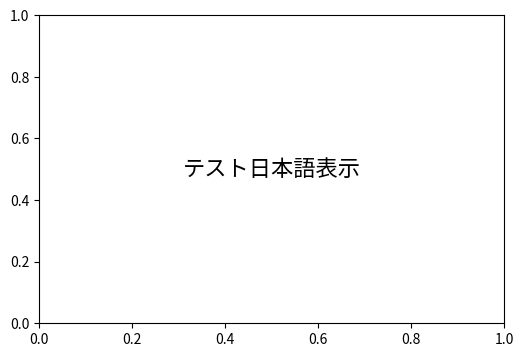

In [96]:
# Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„Çí„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàÊó¢„Å´ÂÆå‰∫ÜÔºâ
# !apt-get -qq install fonts-noto-cjk

# matplotlib„ÅÆ„Éï„Ç©„É≥„Éà„Ç≠„É£„ÉÉ„Ç∑„É•„Çí„ÇØ„É™„Ç¢ÔºàÊ≠£„Åó„ÅÑÊñπÊ≥ïÔºâ
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager.fontManager.addfont('/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÇíË®≠ÂÆö
plt.rcParams['font.family'] = ['Noto Sans CJK JP', 'DejaVu Sans']

# „ÉÜ„Çπ„Éà
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, '„ÉÜ„Çπ„ÉàÊó•Êú¨Ë™ûË°®Á§∫', ha='center', va='center', fontsize=16)
plt.show()

In [101]:
# === Â≠¶Áøí„Éá„Éº„ÇøË©ï‰æ° ===
def evaluate_sample_images(samples, model, transform, config, device,
                          title="ÁîªÂÉèË©ï‰æ°", show_images=True):
    """
    „Çµ„É≥„Éó„É´ÁîªÂÉè„ÇíË©ï‰æ°„Åó„Å¶ÁµêÊûú„ÇíË°®Á§∫Ôºà„Éë„ÉÉ„ÉÅ1„Å§Ë°®Á§∫‰ªò„ÅçÔºâ

    Args:
        samples: Ë©ï‰æ°„Åô„Çã„Çµ„É≥„Éó„É´
        model: Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´
        transform: ÂâçÂá¶ÁêÜ
        config: Ë®≠ÂÆö„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà
        device: „Éá„Éê„Ç§„Çπ
        title: Ë°®Á§∫„Çø„Ç§„Éà„É´
        show_images: ÁîªÂÉèË°®Á§∫ÊúâÁÑ°

    Returns:
        tuple: (Ê≠£Ëß£Êï∞, Á∑èÊï∞, Á≤æÂ∫¶)
    """
    print(f"\n=== {title} ===")

    selected_samples = select_diverse_samples(samples, 10, config.RANDOM_SEED)

    if show_images:
        # 4x5„Ç∞„É™„ÉÉ„ÉâÔºà10„Çµ„É≥„Éó„É´ÂÖ®ÈÉ®Ë°®Á§∫Áî®Ôºâ
        fig, axes = plt.subplots(4, 5, figsize=(20, 16))

    correct = 0
    results = []

    for i, (path, true_cls) in enumerate(selected_samples):
        # „Éë„ÉÉ„ÉÅ„Éô„Éº„Çπ‰∫àÊ∏¨ + „Çµ„É≥„Éó„É´„Éë„ÉÉ„ÉÅÂèñÂæó
        pred_idx, pvec, patch_count, sample_patch = predict_image_with_sample_patch(
            path, model, transform,
            config.PATCH_SIZE, config.TEST_STRIDE,
            class_to_idx, device, "max"
        )

        if pred_idx is None:
            print(f"[{i+1:02d}] ‚ùå Âá¶ÁêÜÂ§±Êïó: {path}")
            continue

        pred_cls = idx_to_class[pred_idx]
        is_correct = (pred_cls == true_cls)
        correct += int(is_correct)

        # ‰∏ä‰Ωç3„ÇØ„É©„Çπ„ÅÆÁ¢∫Áéá
        topk = sorted(enumerate(pvec), key=lambda x: x[1], reverse=True)[:3]
        topk_str = " / ".join([f"{idx_to_class[j]}: {prob*100:.1f}%" for j, prob in topk])

        result_line = (f"[{i+1:02d}] {'‚úÖ' if is_correct else '‚ùå'} "
                      f"GT: {true_cls[:15]}{'...' if len(true_cls)>15 else ''} | "
                      f"PRED: {pred_cls[:15]}{'...' if len(pred_cls)>15 else ''} "
                      f"({patch_count}„Éë„ÉÉ„ÉÅ)")

        results.append(result_line)
        results.append(f"      Á¢∫Áéá: {topk_str}")
        results.append(f"      „Éï„Ç°„Ç§„É´: {path.name}")
        results.append("")

        # ÁîªÂÉèË°®Á§∫
        if show_images and i < 10:
            row = i // 5  # Ë°å„ÅÆË®àÁÆóÔºà0,0,0,0,0,1,1,1,1,1Ôºâ
            col = i % 5   # Âàó„ÅÆË®àÁÆóÔºà0,1,2,3,4,0,1,2,3,4Ôºâ

            try:
                # ÂÖÉÁîªÂÉè
                img = Image.open(path).convert('RGB')
                axes[row*2, col].imshow(img)  # ÂÅ∂Êï∞Ë°åÔºà0,2Ë°åÔºâ„Å´ÁîªÂÉè
                axes[row*2, col].axis('off')

                title_text = (f"[{i+1:02d}] {'‚úÖ' if is_correct else '‚ùå'}\n"
                            f"GT: {true_cls[:10]}{'...' if len(true_cls)>10 else ''}\n"
                            f"PRED: {pred_cls[:10]}{'...' if len(pred_cls)>10 else ''}")
                axes[row*2, col].set_title(title_text, fontsize=9)

                # „Éë„ÉÉ„ÉÅË°®Á§∫
                if sample_patch is not None:
                    axes[row*2+1, col].imshow(sample_patch)  # Â•áÊï∞Ë°åÔºà1,3Ë°åÔºâ„Å´„Éë„ÉÉ„ÉÅ
                    axes[row*2+1, col].set_title(f"„Éë„ÉÉ„ÉÅ‰æã\n64x64", fontsize=8)
                else:
                    axes[row*2+1, col].text(0.5, 0.5, "„Éë„ÉÉ„ÉÅ\nÂèñÂæóÂ§±Êïó", ha='center', va='center')
                axes[row*2+1, col].axis('off')

            except Exception as e:
                axes[row*2, col].text(0.5, 0.5, f"ÁîªÂÉèË™≠„ÅøËæº„Åø\n„Ç®„É©„Éº",
                               ha='center', va='center', transform=axes[row*2, col].transAxes)
                axes[row*2, col].axis('off')
                axes[row*2+1, col].axis('off')

    # Êú™‰ΩøÁî®„ÅÆËª∏„ÇíÈùûË°®Á§∫
    if show_images:
        for i in range(len(selected_samples), 10):
            row = i // 5
            col = i % 5
            axes[row*2, col].axis('off')
            axes[row*2+1, col].axis('off')

        plt.suptitle(f"üìä {title} ÁµêÊûúÔºà„Éë„ÉÉ„ÉÅ‰ªò„ÅçÔºâ", fontsize=16)
        plt.tight_layout()
        plt.show()

    # ÁµêÊûú„Çµ„Éû„É™„Éº
    accuracy = correct / len(selected_samples)
    print("\n".join(results))
    print(f"üìä {title}Á≤æÂ∫¶: {correct}/{len(selected_samples)} = {accuracy:.3f}")

    return correct, len(selected_samples), accuracy

üîç Â≠¶Áøí„Éá„Éº„Çø„Åß„ÅÆÊÄßËÉΩÁ¢∫Ë™ç

=== Â≠¶Áøí„Éá„Éº„ÇøÊ§úË®º ===


/tmp/ipython-input-173615874.py:99: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans, Noto Sans CJK JP.
  plt.tight_layout()
/tmp/ipython-input-173615874.py:99: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans, Noto Sans CJK JP.
  plt.tight_layout()
/tmp/ipython-input-173615874.py:99: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans, Noto Sans CJK JP.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans, Noto Sans CJK JP.
  fig.canvas.print_figure(bytes_io, **kw)


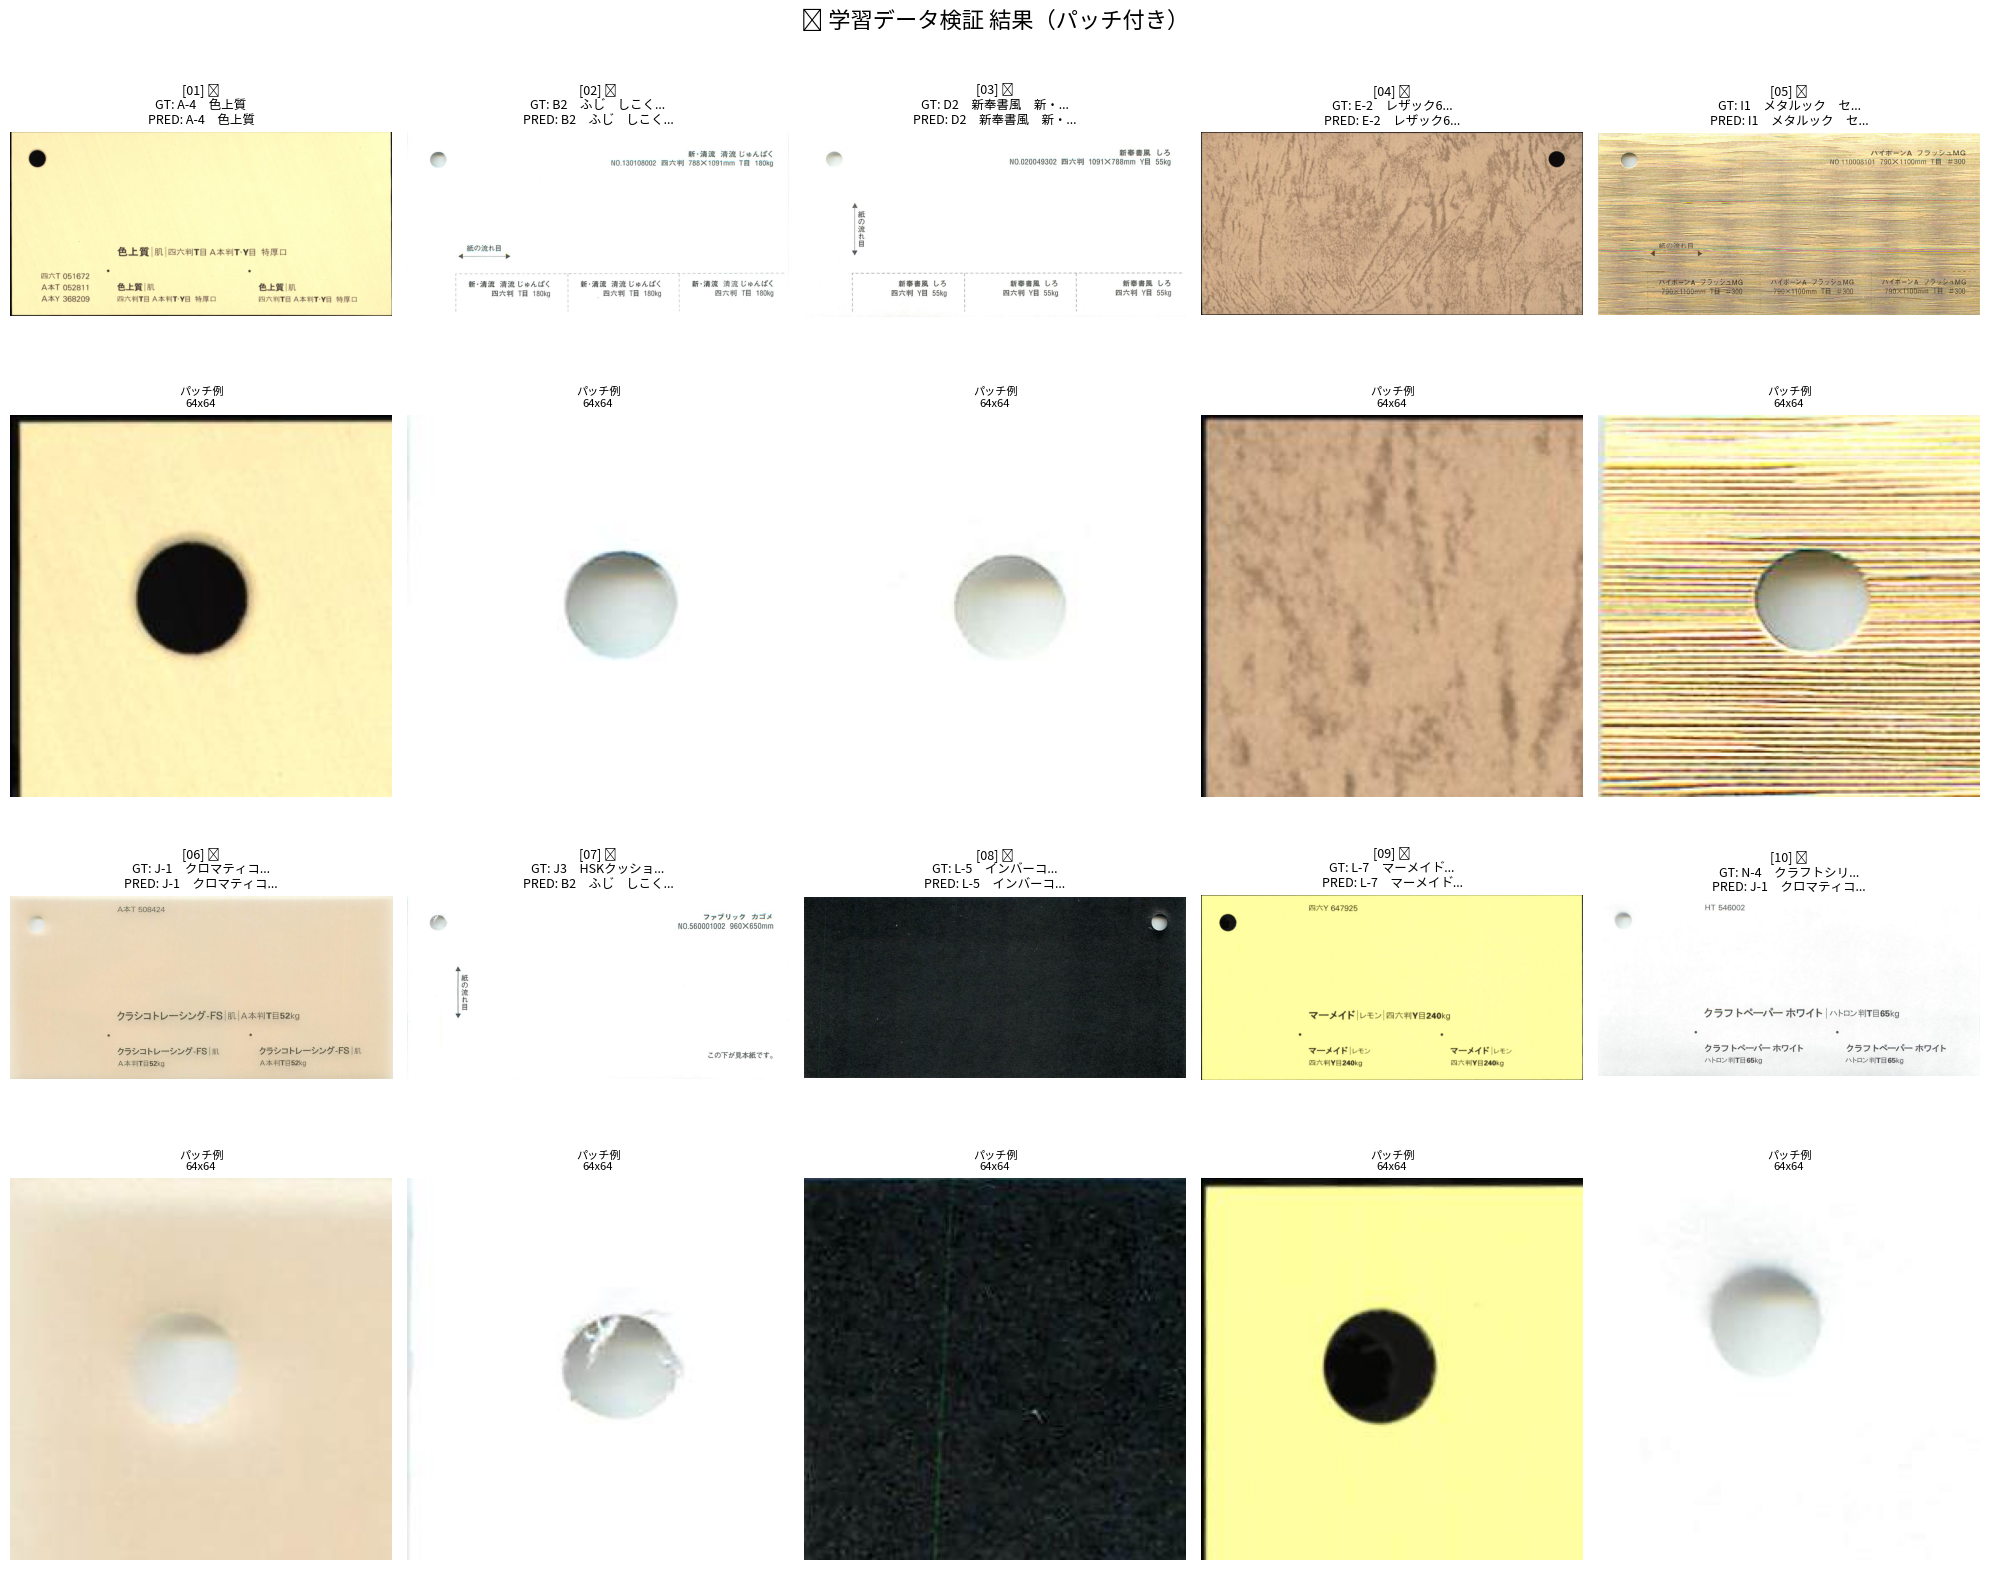

[01] ‚úÖ GT: A-4„ÄÄËâ≤‰∏äË≥™ | PRED: A-4„ÄÄËâ≤‰∏äË≥™ (18„Éë„ÉÉ„ÉÅ)
      Á¢∫Áéá: A-4„ÄÄËâ≤‰∏äË≥™: 100.0% / L-7„ÄÄ„Éû„Éº„É°„Ç§„Éà„Çô-LS: 6.8% / D2„ÄÄÊñ∞Â•âÊõ∏È¢®„ÄÄÊñ∞„ÉªÂåóÊñé„ÄÄ„Éã„É•„Éº„É©„ÇØ„Çô„É™„É≥S„ÄÄ„Éí„Çô„Ç¢„É≥„Ç≥„Éç„É≠F: 0.7%
      „Éï„Ç°„Ç§„É´: 193.JPG

[02] ‚úÖ GT: B2„ÄÄ„Åµ„Åó„Çô„ÄÄ„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ„ÄÄ... | PRED: B2„ÄÄ„Åµ„Åó„Çô„ÄÄ„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ„ÄÄ... (18„Éë„ÉÉ„ÉÅ)
      Á¢∫Áéá: B2„ÄÄ„Åµ„Åó„Çô„ÄÄ„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ„ÄÄÊñ∞„ÉªÊ∏ÖÊµÅ„ÄÄML„Éï„Ç°„Ç§„Éè„Çô„Éº„ÄÄÂ∞èË±ÜÊÆªCoC„ÄÄÊñ∞„ÉªÊòüÁâ©Ë™û„ÄÄ„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞Âà©‰ºë„ÄÄ„Éï„É©„Çπ„Ç≥: 87.5% / D2„ÄÄÊñ∞Â•âÊõ∏È¢®„ÄÄÊñ∞„ÉªÂåóÊñé„ÄÄ„Éã„É•„Éº„É©„ÇØ„Çô„É™„É≥S„ÄÄ„Éí„Çô„Ç¢„É≥„Ç≥„Éç„É≠F: 71.9% / L-5„ÄÄ„Ç§„É≥„Éè„Çô„Éº„Ç≥„Éº„Éà„ÄÄÊ∞óÊ≥°Á¥ô„ÄÄÈªíÊ∞óÊ≥°Á¥ô„ÄÄ„Ç∑„É≥„Éõ„Çô„É´„Éè„Çö„ÉÉ„ÇØ-FS„ÄÄ„Çπ„Éé„Éº„Éï„Çô„É´-FS„ÄÄ„ÉÜ„Ç§„ÇØGA„Éõ„Çô„Éº„Éà„Çô-FS„ÄÄGA„ÇØ„É©„Éï„Éà„Éõ„Çô„Éº„Éà„Çô: 25.6%
      „Éï„Ç°„Ç§„É´: 057.jpg

[03] ‚úÖ GT: D2„ÄÄÊñ∞Â•âÊõ∏È¢®„ÄÄÊñ∞„ÉªÂåóÊñé„ÄÄ„Éã„É•... | PRED: D2„ÄÄÊñ∞Â•âÊõ∏È¢®„ÄÄÊñ∞„ÉªÂåóÊñé„ÄÄ„Éã„É•.

In [102]:
# === Â≠¶Áøí„Éá„Éº„ÇøË©ï‰æ°ÂÆüË°å ===
print("üîç Â≠¶Áøí„Éá„Éº„Çø„Åß„ÅÆÊÄßËÉΩÁ¢∫Ë™ç")
train_correct, train_total, train_acc = evaluate_sample_images(
    train_samples,  # ÊúÄÂàù„Å´‰ΩúÊàê„Åó„Åütrain_samplesÂ§âÊï∞„Çí‰ΩøÁî®
    model, test_tf, config, device,
    title="Â≠¶Áøí„Éá„Éº„ÇøÊ§úË®º", show_images=True
)

üéØ „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß„ÅÆÊúÄÁµÇË©ï‰æ°

=== „ÉÜ„Çπ„Éà„Éá„Éº„ÇøË©ï‰æ° ===


/tmp/ipython-input-3089688802.py:93: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3089688802.py:93: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3089688802.py:93: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3089688802.py:93: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3089688802.py:93: UserWarning: Glyph 36074 (\N{CJK UNIFIED IDEOGRAPH-8CEA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3089688802.py:93: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3089688802.py:93: UserWarning: Glyph 12405 (\N{HIRAGANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tig

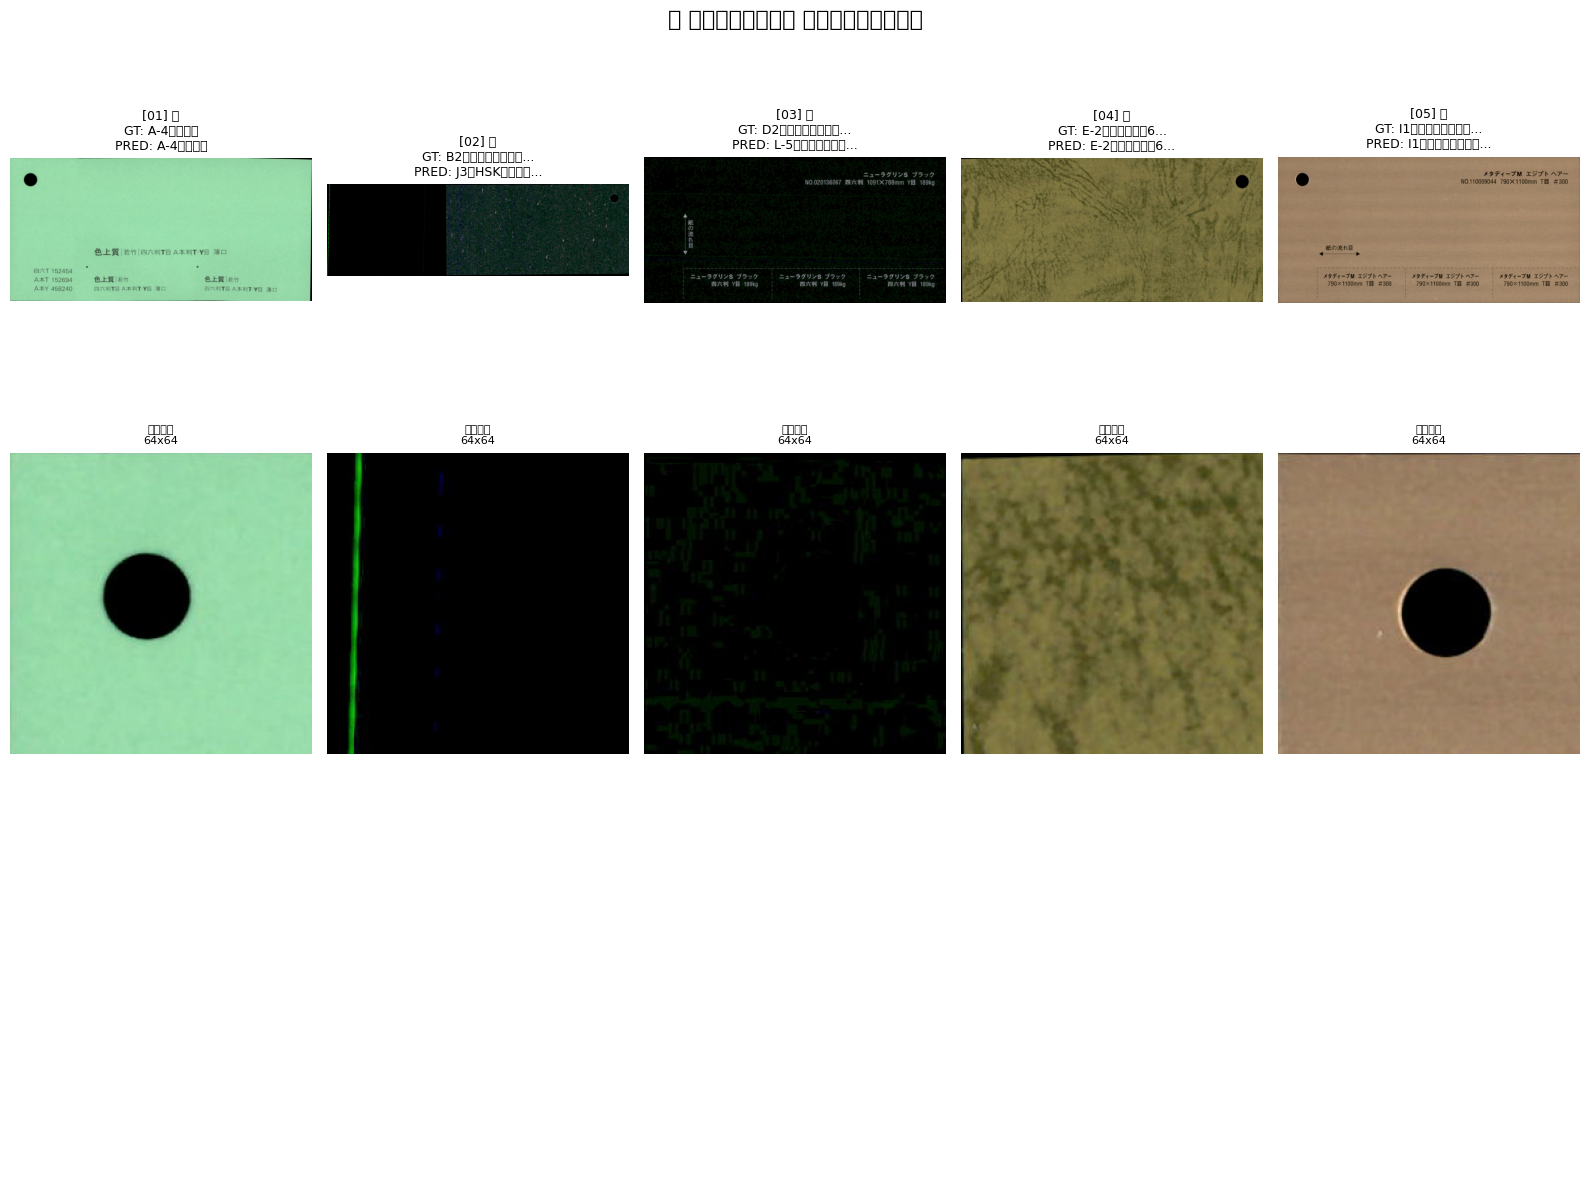

[01] ‚úÖ GT: A-4„ÄÄËâ≤‰∏äË≥™ | PRED: A-4„ÄÄËâ≤‰∏äË≥™ (18„Éë„ÉÉ„ÉÅ)
      Á¢∫Áéá: A-4„ÄÄËâ≤‰∏äË≥™: 99.8% / L-7„ÄÄ„Éû„Éº„É°„Ç§„Éà„Çô-LS: 68.6% / J-1„ÄÄ„ÇØ„É≠„Éû„ÉÜ„Ç£„Ç≥A-FS„ÄÄNT„Éè„Çö„Ç§„É´„ÄÄXDT„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FS„ÄÄ„ÇØ„É©„Ç∑„Ç≥„ÇØ„Çô„É≠„Çπ„ÄÄ„ÇØ„É©„Ç∑„Ç≥„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FS„ÄÄ„ÇØ„É©„Ç∑„Ç≥„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FSÈ¢®„ÉªÊòü„Åè„Åô„Çô„Åó„ÄÄ„Éà„Çô„É™„Éº„Éï„Çö„ÉªW„ÄÄ„Éà„Çô„É™„Éº„Éï„ÇöF„ÄÄ„Ç¢„Éº„Éà„Éà„Çô„É™„Éº„Éï„Çö: 2.4%
      „Éï„Ç°„Ç§„É´: 439.jpg

[02] ‚ùå GT: B2„ÄÄ„Åµ„Åó„Çô„ÄÄ„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ„ÄÄ... | PRED: J3„ÄÄHSK„ÇØ„ÉÉ„Ç∑„Éß„É≥F„ÄÄÁâπA... (33„Éë„ÉÉ„ÉÅ)
      Á¢∫Áéá: J3„ÄÄHSK„ÇØ„ÉÉ„Ç∑„Éß„É≥F„ÄÄÁâπA„ÇØ„ÉÉ„Ç∑„Éß„É≥„ÄÄSS„Ç≥„Éº„Çπ„Çø„Éº„ÄÄ„Éã„É•„Éº„Ç¶„Ç®„Éï„Çô„É≠„É≥„Ç´„É©„Éº„ÄÄ„Éï„Ç°„Éï„Çô„É™„ÉÉ„ÇØ„ÄÄ„Ç≥„É´„ÇØ„Ç∑„Éº„ÉàN: 99.4% / L-5„ÄÄ„Ç§„É≥„Éè„Çô„Éº„Ç≥„Éº„Éà„ÄÄÊ∞óÊ≥°Á¥ô„ÄÄÈªíÊ∞óÊ≥°Á¥ô„ÄÄ„Ç∑„É≥„Éõ„Çô„É´„Éè„Çö„ÉÉ„ÇØ-FS„ÄÄ„Çπ„Éé„Éº„Éï„Çô„É´-FS„ÄÄ„ÉÜ„Ç§„ÇØGA„Éõ„Çô„Éº„Éà„Çô-FS„ÄÄGA„ÇØ„É©„Éï„Éà„Éõ„Çô„Éº„Éà„Çô: 51.2% / E-2„ÄÄ„É¨„Çµ„Çô„ÉÉ„ÇØ66: 37.8%
      „Éï„Ç°„Ç§„É´: 140.jpg

[03] 

In [86]:
# === „ÉÜ„Çπ„Éà„Éá„Éº„ÇøË©ï‰æ°ÂÆüË°å ===
print("üéØ „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Åß„ÅÆÊúÄÁµÇË©ï‰æ°")
test_correct, test_total, test_acc = evaluate_sample_images(
    test_samples, model, test_tf, config, device,
    title="„ÉÜ„Çπ„Éà„Éá„Éº„ÇøË©ï‰æ°", show_images=True
)

In [104]:
# === „Éë„Éï„Ç©„Éº„Éû„É≥„ÇπË©≥Á¥∞ÂàÜÊûê ===
def analyze_class_performance(samples, model, transform, config, device, top_n=10):
    """
    „ÇØ„É©„ÇπÂà•ÊÄßËÉΩÂàÜÊûê

    Args:
        samples: Ë©ï‰æ°„Çµ„É≥„Éó„É´
        model: „É¢„Éá„É´
        transform: ÂâçÂá¶ÁêÜ
        config: Ë®≠ÂÆö
        device: „Éá„Éê„Ç§„Çπ
        top_n: Ë°®Á§∫„Åô„Çã‰∏ä‰Ωç„ÇØ„É©„ÇπÊï∞

    Returns:
        dict: „ÇØ„É©„ÇπÂà•Áµ±Ë®à
    """
    print("\n=== üìä „ÇØ„É©„ÇπÂà•ÊÄßËÉΩÂàÜÊûê ===")

    # „ÇØ„É©„ÇπÂà•„Çµ„É≥„Éó„É´Êï∞„Ç´„Ç¶„É≥„Éà
    class_counts = defaultdict(int)
    for _, cls in samples:
        class_counts[cls] += 1

    # ‰∏ä‰Ωç„ÇØ„É©„Çπ„ÇíÈÅ∏Êäû
    top_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

    class_results = {}

    for cls_name, count in top_classes:
        print(f"\nüîç „ÇØ„É©„Çπ: {cls_name} ({count}Êûö)")

        # Ë©≤ÂΩì„ÇØ„É©„Çπ„ÅÆ„Çµ„É≥„Éó„É´„ÇíÈÅ∏Êäû
        cls_samples = [(p, c) for p, c in samples if c == cls_name]
        selected = select_diverse_samples(cls_samples, min(3, len(cls_samples)), config.RANDOM_SEED)

        correct = 0
        predictions = []

        for path, true_cls in selected:
            pred_idx, pvec, patch_count = predict_image_with_patches(
                path, model, transform,
                config.PATCH_SIZE, config.TEST_STRIDE,
                class_to_idx, device, "max"
            )

            if pred_idx is not None:
                pred_cls = idx_to_class[pred_idx]
                is_correct = (pred_cls == true_cls)
                correct += int(is_correct)

                confidence = pvec[pred_idx] * 100
                predictions.append({
                    'file': path.name,
                    'correct': is_correct,
                    'predicted': pred_cls,
                    'confidence': confidence,
                    'patches': patch_count
                })

        accuracy = correct / len(selected) if selected else 0
        avg_confidence = sum(p['confidence'] for p in predictions) / len(predictions) if predictions else 0

        class_results[cls_name] = {
            'accuracy': accuracy,
            'confidence': avg_confidence,
            'sample_count': count,
            'predictions': predictions
        }

        print(f"   ‚úÖ Á≤æÂ∫¶: {accuracy:.3f} ({correct}/{len(selected)})")
        print(f"   üéØ Âπ≥ÂùáÁ¢∫‰ø°Â∫¶: {avg_confidence:.1f}%")

        # Ë©≥Á¥∞ÁµêÊûú
        for pred in predictions:
            status = "‚úÖ" if pred['correct'] else "‚ùå"
            print(f"     {status} {pred['file'][:30]} | Á¢∫‰ø°Â∫¶: {pred['confidence']:.1f}% | {pred['patches']}„Éë„ÉÉ„ÉÅ")

    return class_results

# „ÇØ„É©„ÇπÂà•ÂàÜÊûêÂÆüË°å
class_perf = analyze_class_performance(test_samples, model, test_tf, config, device)



=== üìä „ÇØ„É©„ÇπÂà•ÊÄßËÉΩÂàÜÊûê ===

üîç „ÇØ„É©„Çπ: E-2„ÄÄ„É¨„Çµ„Çô„ÉÉ„ÇØ66 (502Êûö)
   ‚úÖ Á≤æÂ∫¶: 1.000 (3/3)
   üéØ Âπ≥ÂùáÁ¢∫‰ø°Â∫¶: 100.0%
     ‚úÖ 445.jpg | Á¢∫‰ø°Â∫¶: 100.0% | 18„Éë„ÉÉ„ÉÅ
     ‚úÖ 180.jpg | Á¢∫‰ø°Â∫¶: 99.9% | 18„Éë„ÉÉ„ÉÅ
     ‚úÖ 132.jpg | Á¢∫‰ø°Â∫¶: 99.9% | 18„Éë„ÉÉ„ÉÅ

üîç „ÇØ„É©„Çπ: A-4„ÄÄËâ≤‰∏äË≥™ (464Êûö)
   ‚úÖ Á≤æÂ∫¶: 1.000 (3/3)
   üéØ Âπ≥ÂùáÁ¢∫‰ø°Â∫¶: 98.1%
     ‚úÖ 439.jpg | Á¢∫‰ø°Â∫¶: 99.8% | 18„Éë„ÉÉ„ÉÅ
     ‚úÖ 165.jpg | Á¢∫‰ø°Â∫¶: 99.9% | 18„Éë„ÉÉ„ÉÅ
     ‚úÖ 124.jpg | Á¢∫‰ø°Â∫¶: 94.4% | 18„Éë„ÉÉ„ÉÅ

üîç „ÇØ„É©„Çπ: B2„ÄÄ„Åµ„Åó„Çô„ÄÄ„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ„ÄÄÊñ∞„ÉªÊ∏ÖÊµÅ„ÄÄML„Éï„Ç°„Ç§„Éè„Çô„Éº„ÄÄÂ∞èË±ÜÊÆªCoC„ÄÄÊñ∞„ÉªÊòüÁâ©Ë™û„ÄÄ„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞Âà©‰ºë„ÄÄ„Éï„É©„Çπ„Ç≥ (254Êûö)
   ‚úÖ Á≤æÂ∫¶: 0.667 (2/3)
   üéØ Âπ≥ÂùáÁ¢∫‰ø°Â∫¶: 96.0%
     ‚úÖ 019.jpg | Á¢∫‰ø°Â∫¶: 99.4% | 18„Éë„ÉÉ„ÉÅ
     ‚ùå 140.jpg | Á¢∫‰ø°Â∫¶: 99.4% | 33„Éë„ÉÉ„ÉÅ
     ‚úÖ 114.jpg | Á¢∫‰ø°Â∫¶: 89.3% | 18„Éë„ÉÉ„ÉÅ

üîç „ÇØ„É©„Çπ: J-1„ÄÄ„ÇØ„É≠„Éû„ÉÜ„Ç£„Ç≥A-FS„Ä

In [88]:
# === ÊúÄÁµÇÁµêÊûú„Çµ„Éû„É™„Éº ===
def print_final_summary(train_acc, test_acc, class_perf, config):
    """ÊúÄÁµÇÁµêÊûú„Çí„Çµ„Éû„É™„ÉºË°®Á§∫"""
    print("\n" + "="*60)
    print("üéâ ÊúÄÁµÇË©ï‰æ°ÁµêÊûú„Çµ„Éû„É™„Éº")
    print("="*60)

    print(f"üìä „É¢„Éá„É´Ë®≠ÂÆö:")
    print(f"   - „Ç¢„Éº„Ç≠„ÉÜ„ÇØ„ÉÅ„É£: ResNet18")
    print(f"   - „Éë„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: {config.PATCH_SIZE}x{config.PATCH_SIZE}")
    print(f"   - Â≠¶Áøí„Çπ„Éà„É©„Ç§„Éâ: {config.TRAIN_STRIDE}")
    print(f"   - „ÉÜ„Çπ„Éà„Çπ„Éà„É©„Ç§„Éâ: {config.TEST_STRIDE}")
    print(f"   - „Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: {config.BATCH_SIZE}")
    print(f"   - „Ç®„Éù„ÉÉ„ÇØÊï∞: {config.NUM_EPOCHS}")

    print(f"\nüìà ÊÄßËÉΩÁµêÊûú:")
    print(f"   - Â≠¶Áøí„Éá„Éº„ÇøÁ≤æÂ∫¶: {train_acc:.3f}")
    print(f"   - „ÉÜ„Çπ„Éà„Éá„Éº„ÇøÁ≤æÂ∫¶: {test_acc:.3f}")

    if class_perf:
        avg_class_acc = sum(info['accuracy'] for info in class_perf.values()) / len(class_perf)
        avg_confidence = sum(info['confidence'] for info in class_perf.values()) / len(class_perf)
        print(f"   - Âπ≥Âùá„ÇØ„É©„ÇπÁ≤æÂ∫¶: {avg_class_acc:.3f}")
        print(f"   - Âπ≥ÂùáÁ¢∫‰ø°Â∫¶: {avg_confidence:.1f}%")

    print(f"\nüíæ ‰øùÂ≠ò„Éï„Ç°„Ç§„É´:")
    print(f"   - train_index.pt: Â≠¶ÁøíÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ")
    print(f"   - test_index.pt: „ÉÜ„Çπ„ÉàÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ")

    print("\nüîß ÊîπÂñÑÊèêÊ°à:")
    if test_acc < 0.7:
        print("   - „Éá„Éº„ÇøÊã°Âºµ„ÅÆËøΩÂä†„ÇíÊ§úË®é")
        print("   - „Çà„ÇäÂ§ß„Åç„Å™„É¢„Éá„É´(ResNet50Á≠â)„ÅÆ‰ΩøÁî®")
        print("   - Â≠¶Áøí„Ç®„Éù„ÉÉ„ÇØÊï∞„ÅÆÂ¢óÂä†")
    elif test_acc > 0.9:
        print("   - „É¢„Éá„É´„ÅÆËªΩÈáèÂåñ„ÅåÂèØËÉΩ„Åã„ÇÇ„Åó„Çå„Åæ„Åõ„Çì")
        print("   - „Çà„ÇäÂõ∞Èõ£„Å™„ÉÜ„Çπ„Éà„Ç±„Éº„Çπ„ÅÆËøΩÂä†„ÇíÊ§úË®é")
    else:
        print("   - „Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅßÊõ¥„Å™„ÇãÊîπÂñÑ„ÅåÊúüÂæÖ„Åß„Åç„Åæ„Åô")
        print("   - „ÇØ„É©„Çπ‰∏çÂùáË°°„ÅÆÂØæÁ≠ñ„ÇíÊ§úË®é")

    print("="*60)

print_final_summary(train_acc, test_acc, class_perf, config)


üéâ ÊúÄÁµÇË©ï‰æ°ÁµêÊûú„Çµ„Éû„É™„Éº
üìä „É¢„Éá„É´Ë®≠ÂÆö:
   - „Ç¢„Éº„Ç≠„ÉÜ„ÇØ„ÉÅ„É£: ResNet18
   - „Éë„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: 224x224
   - Â≠¶Áøí„Çπ„Éà„É©„Ç§„Éâ: 224
   - „ÉÜ„Çπ„Éà„Çπ„Éà„É©„Ç§„Éâ: 224
   - „Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: 128
   - „Ç®„Éù„ÉÉ„ÇØÊï∞: 3

üìà ÊÄßËÉΩÁµêÊûú:
   - Â≠¶Áøí„Éá„Éº„ÇøÁ≤æÂ∫¶: 0.800
   - „ÉÜ„Çπ„Éà„Éá„Éº„ÇøÁ≤æÂ∫¶: 0.600
   - Âπ≥Âùá„ÇØ„É©„ÇπÁ≤æÂ∫¶: 0.800
   - Âπ≥ÂùáÁ¢∫‰ø°Â∫¶: 94.9%

üíæ ‰øùÂ≠ò„Éï„Ç°„Ç§„É´:
   - train_index.pt: Â≠¶ÁøíÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ
   - test_index.pt: „ÉÜ„Çπ„ÉàÁî®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ

üîß ÊîπÂñÑÊèêÊ°à:
   - „Éá„Éº„ÇøÊã°Âºµ„ÅÆËøΩÂä†„ÇíÊ§úË®é
   - „Çà„ÇäÂ§ß„Åç„Å™„É¢„Éá„É´(ResNet50Á≠â)„ÅÆ‰ΩøÁî®
   - Â≠¶Áøí„Ç®„Éù„ÉÉ„ÇØÊï∞„ÅÆÂ¢óÂä†


In [89]:
# === „É¢„Éá„É´‰øùÂ≠ò ===
def save_model_and_config(model, config, class_to_idx, save_dir="./saved_model"):
    """
    „É¢„Éá„É´„Å®Ë®≠ÂÆö„Çí‰øùÂ≠ò

    Args:
        model: Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´
        config: Ë®≠ÂÆö„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà
        class_to_idx: „ÇØ„É©„ÇπËæûÊõ∏
        save_dir: ‰øùÂ≠ò„Éá„Ç£„É¨„ÇØ„Éà„É™
    """
    save_path = Path(save_dir)
    save_path.mkdir(exist_ok=True)

    # „É¢„Éá„É´‰øùÂ≠ò
    model_path = save_path / "model.pt"
    torch.save({
        'model_state_dict': model.state_dict(),
        'model_class': 'ResNet18',
        'num_classes': len(class_to_idx),
    }, model_path)

    # Ë®≠ÂÆö„Éª„ÇØ„É©„ÇπÊÉÖÂ†±‰øùÂ≠ò
    config_path = save_path / "config.json"
    config_data = {
        'patch_size': config.PATCH_SIZE,
        'train_stride': config.TRAIN_STRIDE,
        'test_stride': config.TEST_STRIDE,
        'batch_size': config.BATCH_SIZE,
        'num_epochs': config.NUM_EPOCHS,
        'learning_rate': config.LEARNING_RATE,
        'class_to_idx': class_to_idx,
        'idx_to_class': {str(k): v for k, v in idx_to_class.items()},
        'num_classes': len(class_to_idx)
    }

    with open(config_path, 'w', encoding='utf-8') as f:
        json.dump(config_data, f, indent=2, ensure_ascii=False)

    print(f"üíæ „É¢„Éá„É´‰øùÂ≠òÂÆå‰∫Ü: {model_path}")
    print(f"üíæ Ë®≠ÂÆö‰øùÂ≠òÂÆå‰∫Ü: {config_path}")

# „É¢„Éá„É´‰øùÂ≠òÂÆüË°å
save_model_and_config(model, config, class_to_idx)

üíæ „É¢„Éá„É´‰øùÂ≠òÂÆå‰∫Ü: saved_model/model.pt
üíæ Ë®≠ÂÆö‰øùÂ≠òÂÆå‰∫Ü: saved_model/config.json


# 6. Êé®Ë´ñÁî®„É¶„Éº„ÉÜ„Ç£„É™„ÉÜ„Ç£


In [90]:
# === Êé®Ë´ñÁî®„ÇØ„É©„Çπ ===
class PaperClassifier:
    """
    Êé®Ë´ñÂ∞ÇÁî®„ÇØ„É©„Çπ

    Features:
    - ‰øùÂ≠òÊ∏à„Åø„É¢„Éá„É´„ÅÆ„É≠„Éº„Éâ
    - Âçò‰∏ÄÁîªÂÉè„ÅÆÂàÜÈ°û
    - „Éê„ÉÉ„ÉÅÊé®Ë´ñÂØæÂøú
    """

    def __init__(self, model_path, config_path, device=None):
        """
        Args:
            model_path: „É¢„Éá„É´„Éï„Ç°„Ç§„É´„Éë„Çπ
            config_path: Ë®≠ÂÆö„Éï„Ç°„Ç§„É´„Éë„Çπ
            device: Êé®Ë´ñ„Éá„Éê„Ç§„Çπ
        """
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Ë®≠ÂÆöË™≠„ÅøËæº„Åø
        with open(config_path, 'r', encoding='utf-8') as f:
            self.config = json.load(f)

        # „ÇØ„É©„ÇπÊÉÖÂ†±
        self.class_to_idx = self.config['class_to_idx']
        self.idx_to_class = {int(k): v for k, v in self.config['idx_to_class'].items()}
        self.num_classes = self.config['num_classes']

        # „É¢„Éá„É´ÊßãÁØâ„Éª„É≠„Éº„Éâ
        self.model = create_model(self.num_classes, pretrained=False)
        checkpoint = torch.load(model_path, map_location=self.device)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.model.to(self.device)
        self.model.eval()

        # ÂâçÂá¶ÁêÜ
        _, self.transform = get_transforms()

        print(f"ü§ñ ÂàÜÈ°ûÂô®ÂàùÊúüÂåñÂÆå‰∫Ü")
        print(f"   - „ÇØ„É©„ÇπÊï∞: {self.num_classes}")
        print(f"   - „Éá„Éê„Ç§„Çπ: {self.device}")

    def predict_single(self, image_path, aggregation="max", return_confidence=True):
        """
        Âçò‰∏ÄÁîªÂÉè„ÅÆÂàÜÈ°û

        Args:
            image_path: ÁîªÂÉè„Éë„Çπ
            aggregation: „Éë„ÉÉ„ÉÅÈõÜÁ¥ÑÊñπÊ≥ï
            return_confidence: Á¢∫‰ø°Â∫¶ËøîÂç¥ÊúâÁÑ°

        Returns:
            dict: ‰∫àÊ∏¨ÁµêÊûú
        """
        pred_idx, pvec, patch_count = predict_image_with_patches(
            image_path, self.model, self.transform,
            self.config['patch_size'], self.config['test_stride'],
            self.class_to_idx, self.device, aggregation
        )

        if pred_idx is None:
            return {'error': 'Failed to process image'}

        result = {
            'predicted_class': self.idx_to_class[pred_idx],
            'predicted_index': pred_idx,
            'patch_count': patch_count
        }

        if return_confidence:
            result['confidence'] = float(pvec[pred_idx])
            # ‰∏ä‰Ωç3„ÇØ„É©„Çπ
            topk = sorted(enumerate(pvec), key=lambda x: x[1], reverse=True)[:3]
            result['top_predictions'] = [
                {
                    'class': self.idx_to_class[idx],
                    'confidence': float(conf)
                }
                for idx, conf in topk
            ]

        return result

    def predict_batch(self, image_paths, aggregation="max"):
        """
        „Éê„ÉÉ„ÉÅÊé®Ë´ñ

        Args:
            image_paths: ÁîªÂÉè„Éë„Çπ„ÅÆ„É™„Çπ„Éà
            aggregation: „Éë„ÉÉ„ÉÅÈõÜÁ¥ÑÊñπÊ≥ï

        Returns:
            list: ‰∫àÊ∏¨ÁµêÊûú„ÅÆ„É™„Çπ„Éà
        """
        results = []
        for path in tqdm(image_paths, desc="üîÆ „Éê„ÉÉ„ÉÅÊé®Ë´ñ"):
            result = self.predict_single(path, aggregation)
            result['image_path'] = str(path)
            results.append(result)
        return results

In [91]:
# === Êé®Ë´ñ„Éá„É¢ ===
def demo_inference():
    """Êé®Ë´ñ„Éá„É¢ÂÆüË°å"""
    print("\n=== üîÆ Êé®Ë´ñ„Éá„É¢ ===")

    # ÂàÜÈ°ûÂô®ÂàùÊúüÂåñ
    classifier = PaperClassifier("./saved_model/model.pt", "./saved_model/config.json")

    # „ÉÜ„Çπ„Éà„Çµ„É≥„Éó„É´„ÅßÊé®Ë´ñ„ÉÜ„Çπ„Éà
    demo_samples = select_diverse_samples(test_samples, 3, config.RANDOM_SEED)

    print("üìã Êé®Ë´ñÁµêÊûú:")
    for i, (path, true_cls) in enumerate(demo_samples, 1):
        result = classifier.predict_single(path)

        if 'error' in result:
            print(f"[{i}] ‚ùå „Ç®„É©„Éº: {result['error']}")
            continue

        is_correct = result['predicted_class'] == true_cls
        status = "‚úÖ" if is_correct else "‚ùå"

        print(f"\n[{i}] {status} ÁîªÂÉè: {path.name}")
        print(f"    Ê≠£Ëß£: {true_cls}")
        print(f"    ‰∫àÊ∏¨: {result['predicted_class']}")
        print(f"    Á¢∫‰ø°Â∫¶: {result['confidence']:.3f}")
        print(f"    „Éë„ÉÉ„ÉÅÊï∞: {result['patch_count']}")

        print("    ‰∏ä‰Ωç3‰∫àÊ∏¨:")
        for j, pred in enumerate(result['top_predictions'], 1):
            print(f"      {j}. {pred['class']}: {pred['confidence']:.3f}")

# Êé®Ë´ñ„Éá„É¢ÂÆüË°å
demo_inference()



=== üîÆ Êé®Ë´ñ„Éá„É¢ ===
ü§ñ ÂàÜÈ°ûÂô®ÂàùÊúüÂåñÂÆå‰∫Ü
   - „ÇØ„É©„ÇπÊï∞: 10
   - „Éá„Éê„Ç§„Çπ: cuda
üìã Êé®Ë´ñÁµêÊûú:

[1] ‚úÖ ÁîªÂÉè: 439.jpg
    Ê≠£Ëß£: A-4„ÄÄËâ≤‰∏äË≥™
    ‰∫àÊ∏¨: A-4„ÄÄËâ≤‰∏äË≥™
    Á¢∫‰ø°Â∫¶: 0.998
    „Éë„ÉÉ„ÉÅÊï∞: 18
    ‰∏ä‰Ωç3‰∫àÊ∏¨:
      1. A-4„ÄÄËâ≤‰∏äË≥™: 0.998
      2. L-7„ÄÄ„Éû„Éº„É°„Ç§„Éà„Çô-LS: 0.686
      3. J-1„ÄÄ„ÇØ„É≠„Éû„ÉÜ„Ç£„Ç≥A-FS„ÄÄNT„Éè„Çö„Ç§„É´„ÄÄXDT„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FS„ÄÄ„ÇØ„É©„Ç∑„Ç≥„ÇØ„Çô„É≠„Çπ„ÄÄ„ÇØ„É©„Ç∑„Ç≥„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FS„ÄÄ„ÇØ„É©„Ç∑„Ç≥„Éà„É¨„Éº„Ç∑„É≥„ÇØ„Çô-FSÈ¢®„ÉªÊòü„Åè„Åô„Çô„Åó„ÄÄ„Éà„Çô„É™„Éº„Éï„Çö„ÉªW„ÄÄ„Éà„Çô„É™„Éº„Éï„ÇöF„ÄÄ„Ç¢„Éº„Éà„Éà„Çô„É™„Éº„Éï„Çö: 0.024

[2] ‚ùå ÁîªÂÉè: 140.jpg
    Ê≠£Ëß£: B2„ÄÄ„Åµ„Åó„Çô„ÄÄ„Åó„Åì„Åè„Å¶„Çì„Çå„ÅÑ„ÄÄÊñ∞„ÉªÊ∏ÖÊµÅ„ÄÄML„Éï„Ç°„Ç§„Éè„Çô„Éº„ÄÄÂ∞èË±ÜÊÆªCoC„ÄÄÊñ∞„ÉªÊòüÁâ©Ë™û„ÄÄ„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞„Ç¢„Éà„É¢„Çπ„ÄÄÊñ∞Âà©‰ºë„ÄÄ„Éï„É©„Çπ„Ç≥
    ‰∫àÊ∏¨: J3„ÄÄHSK„ÇØ„ÉÉ„Ç∑„Éß„É≥F„ÄÄÁâπA„ÇØ„ÉÉ„Ç∑„Éß„É≥„ÄÄSS„Ç≥„Éº„Çπ„Çø„Éº„ÄÄ„Éã„É•„Éº„Ç¶„Ç®„Éï„Çô„É≠„É≥„Ç´„É©„Éº„ÄÄ„Éï„Ç°„Éï„Çô„É™„ÉÉ„ÇØ„ÄÄ„Ç≥„É´„ÇØ„Ç∑„É